# 1. Data understanding and cleaning 

In [2]:
#load the dataset 
import pandas as pd
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(data.shape)
#the dataset has 1470 rows and 35 columns 

(1470, 35)


In [4]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
import pandas as pd
data.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### missing data 

In [6]:
print(data.isnull().sum().sort_values(ascending=False))  # check feature columns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# find percentage of missing data 
missing_counts = data.isnull().sum() #count missing values per column
missing_percentage = 100 * missing_counts / len(data)
missing_info = missing_percentage[missing_percentage > 0] #must be greater than 0
missing_info_sorted = missing_info.sort_values(ascending=False) 
print("Percentage of missing values in each column:")
print(missing_info_sorted)


Percentage of missing values in each column:
Series([], dtype: float64)


### check for invalid entries 

In [8]:
data.apply(lambda x: x.unique())
#to check for any disguised null values in the dataset or entries with invalid values


Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

### removing duplicates

In [9]:
data = data.drop_duplicates()


# 2. Exploratory Data Analysis (EDA)

In [10]:

# separate numercial and categorical features without target feature

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols = [col for col in numerical_cols if col != 'Attrition']
categorical_cols = [col for col in categorical_cols if col != 'Attrition']


In [11]:
# graph settings 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### histogram visualisation

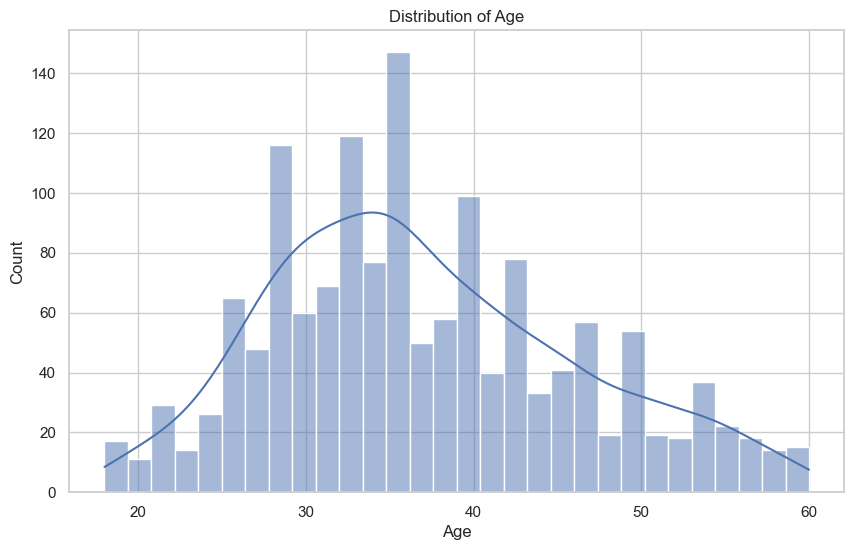

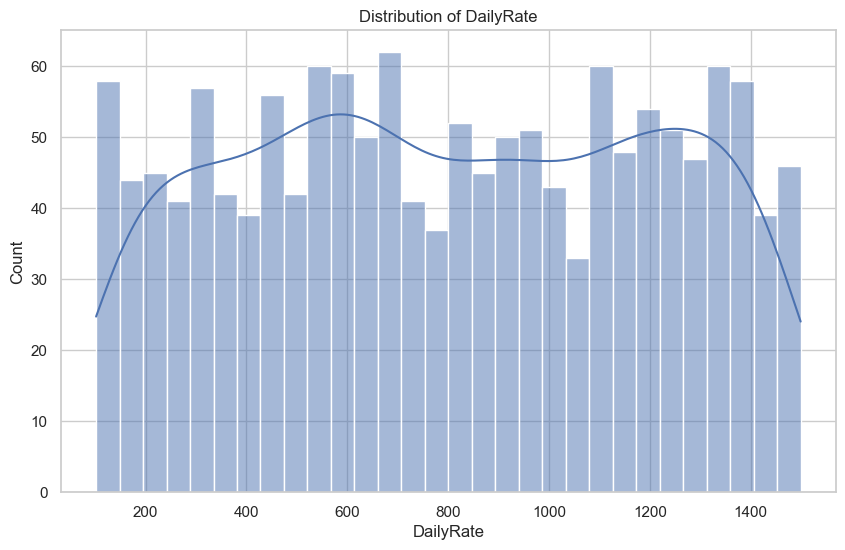

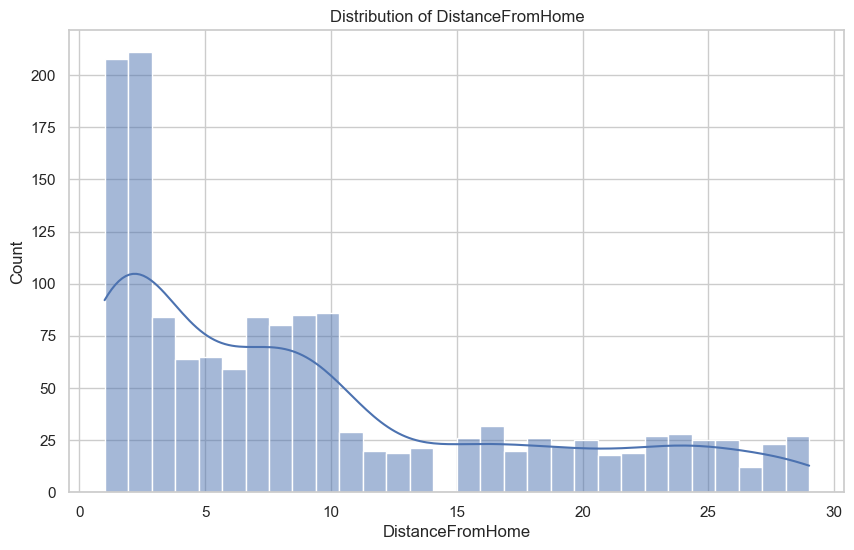

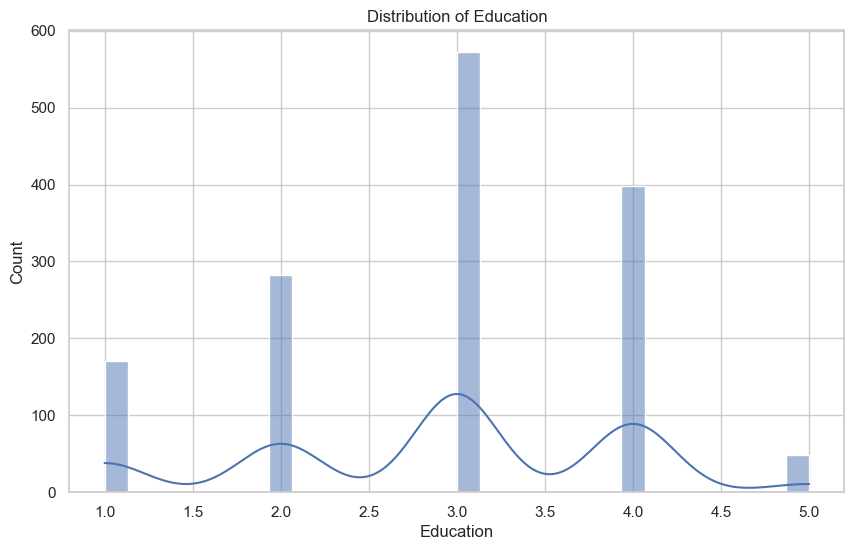

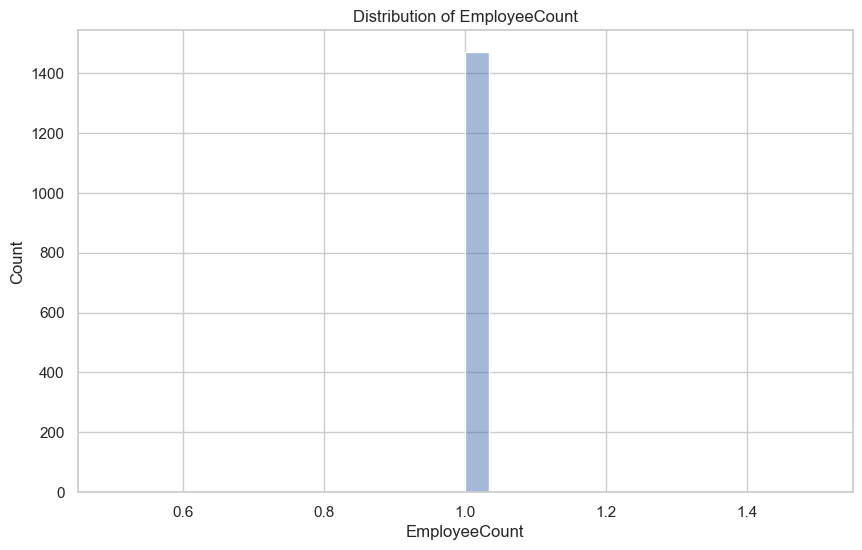

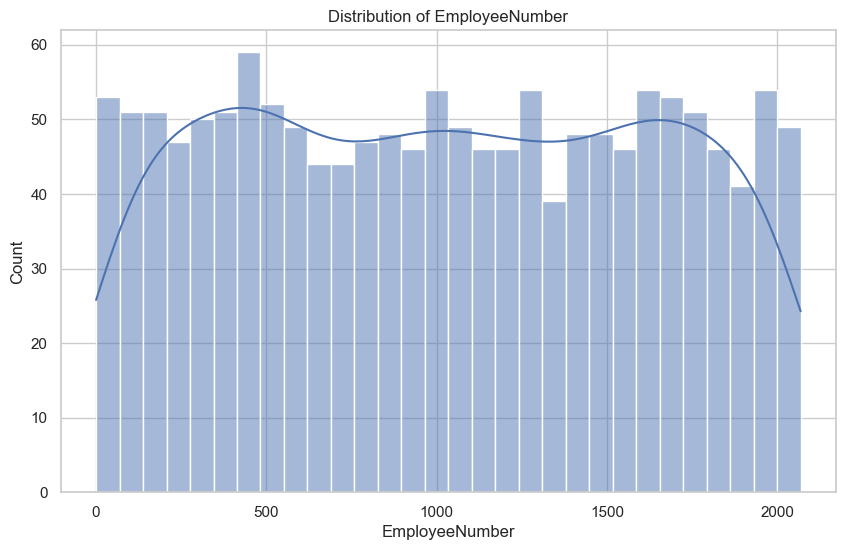

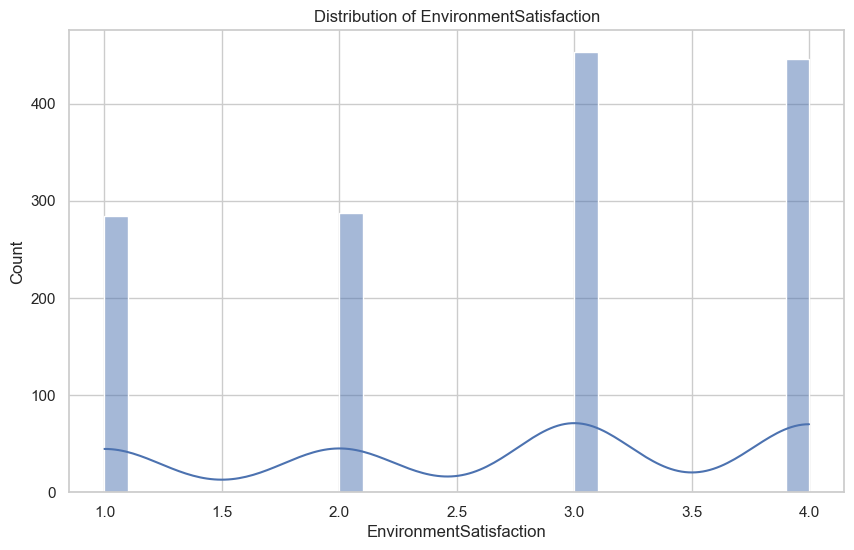

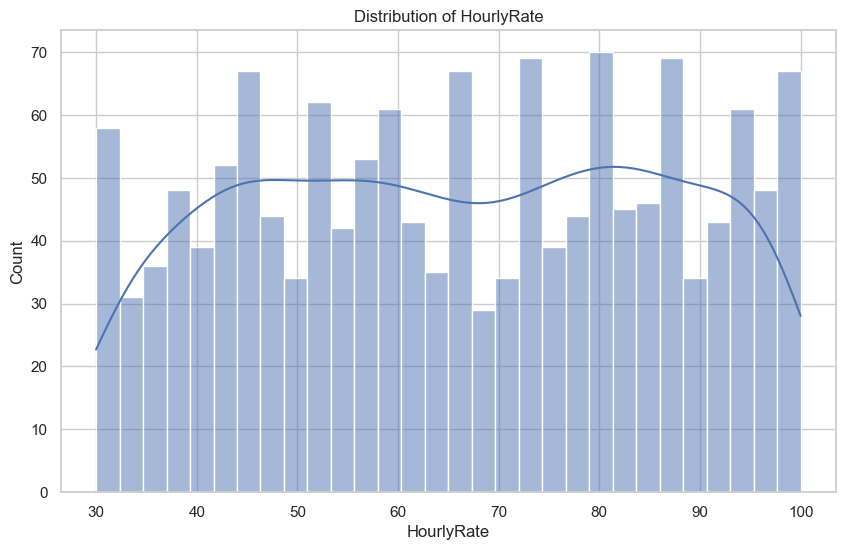

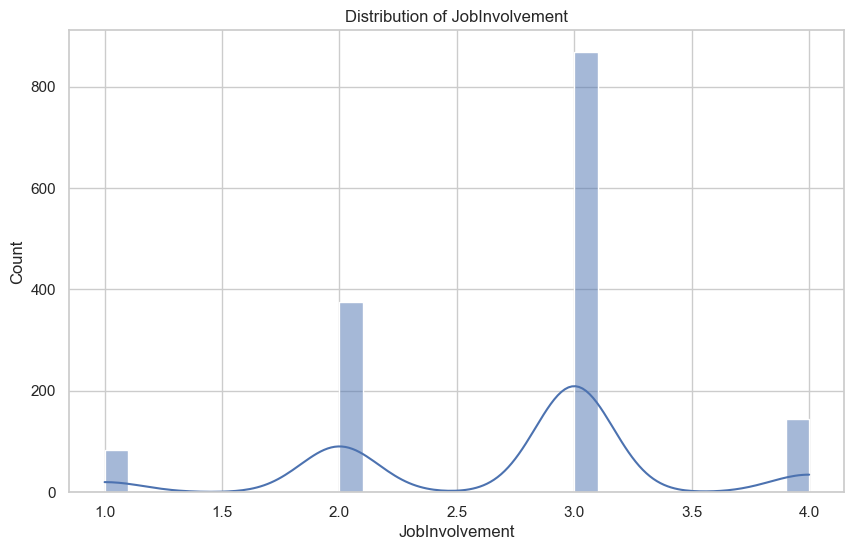

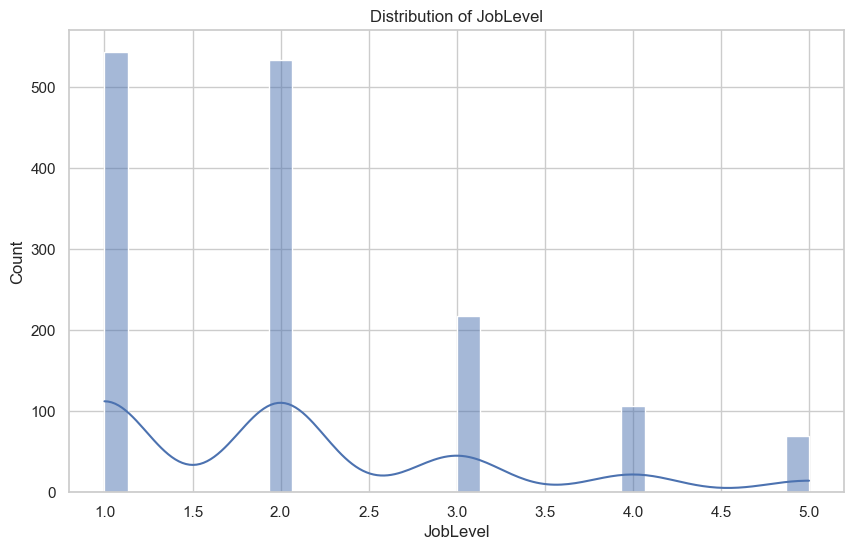

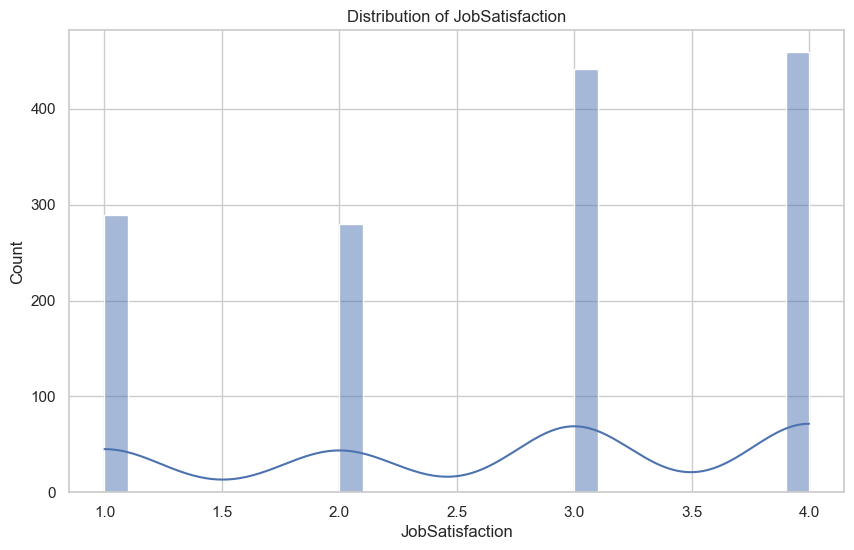

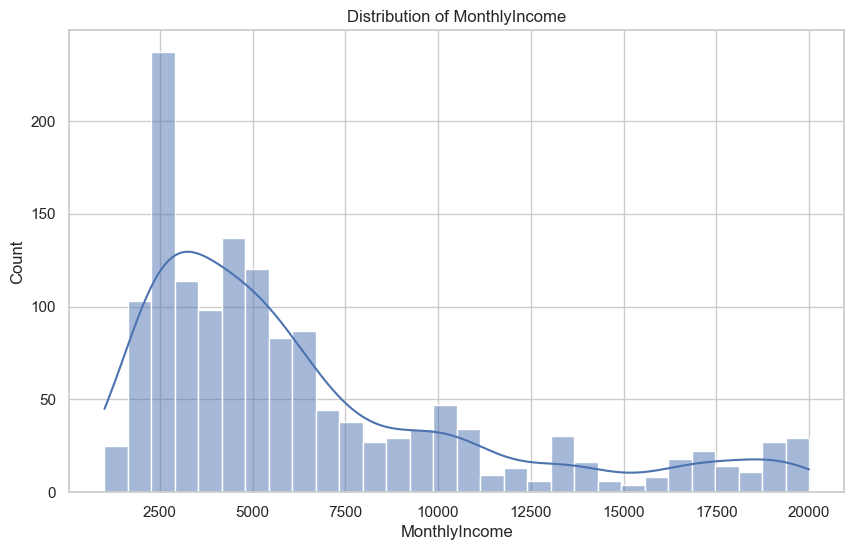

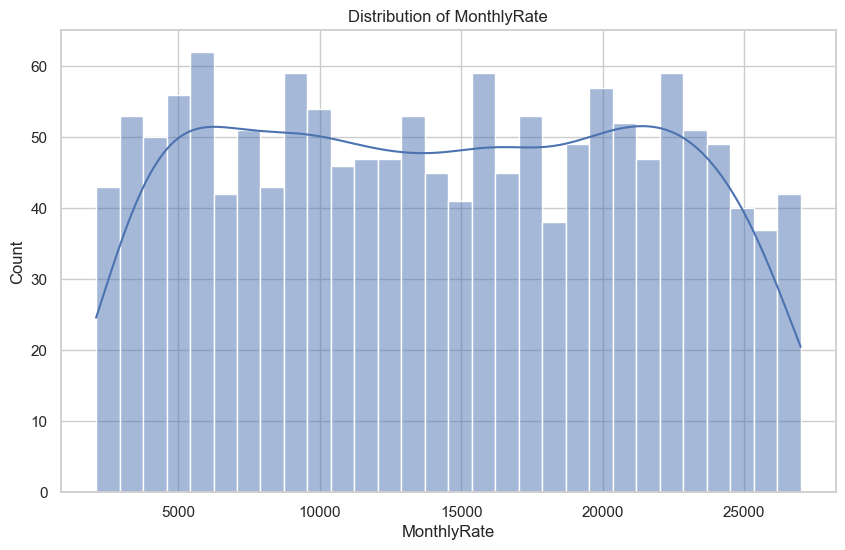

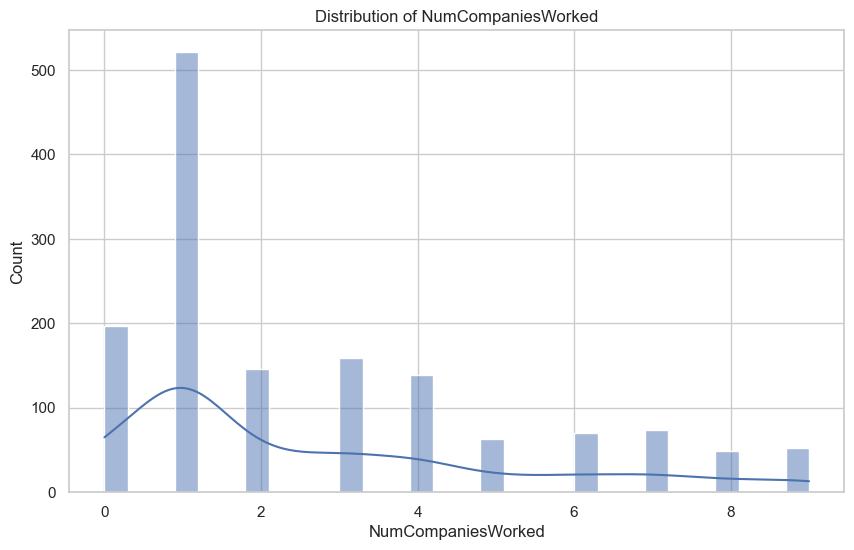

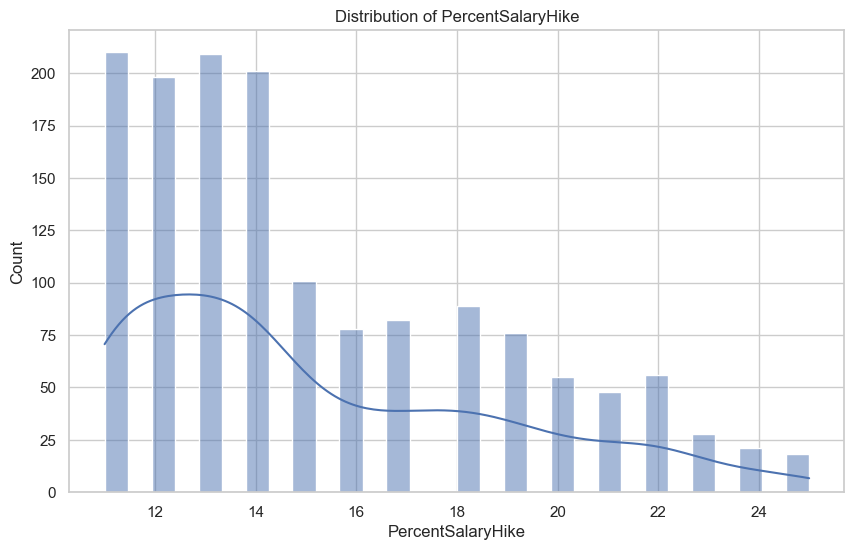

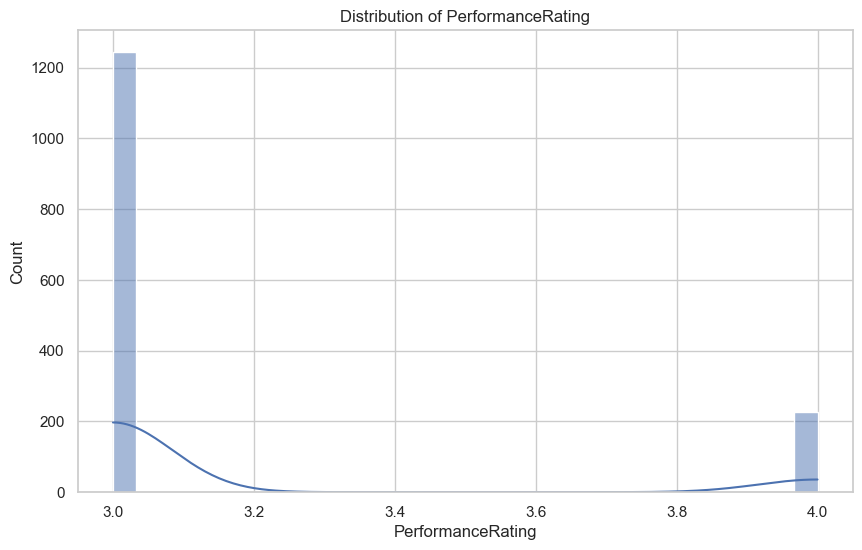

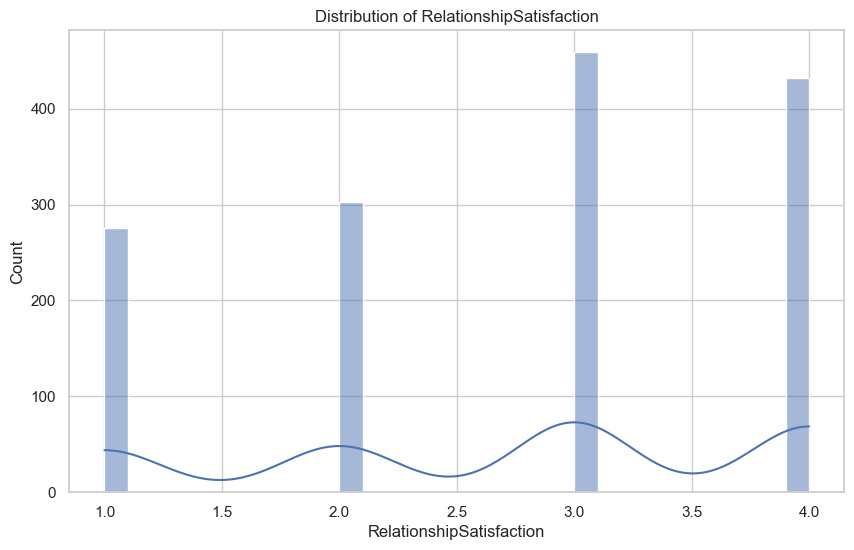

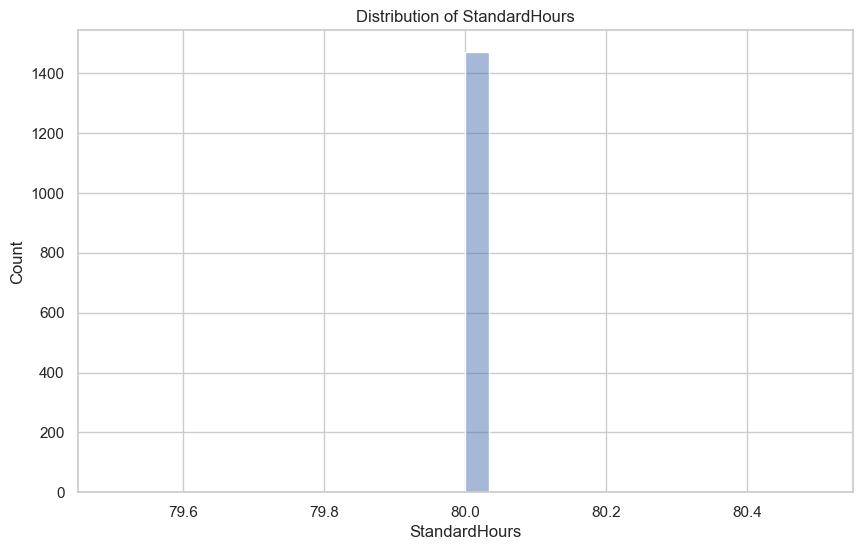

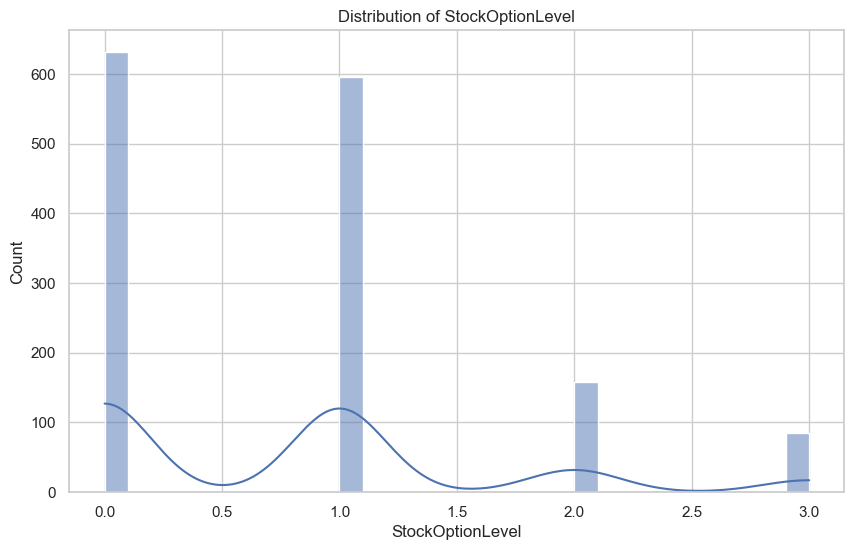

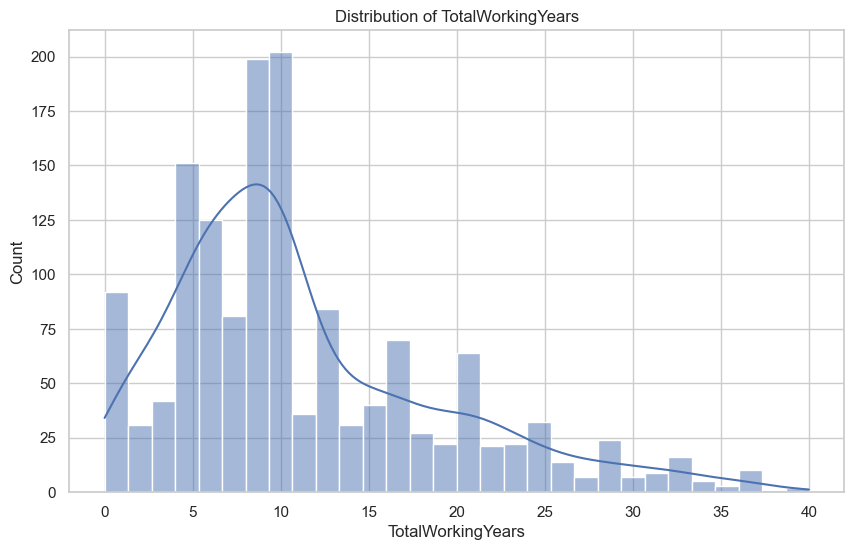

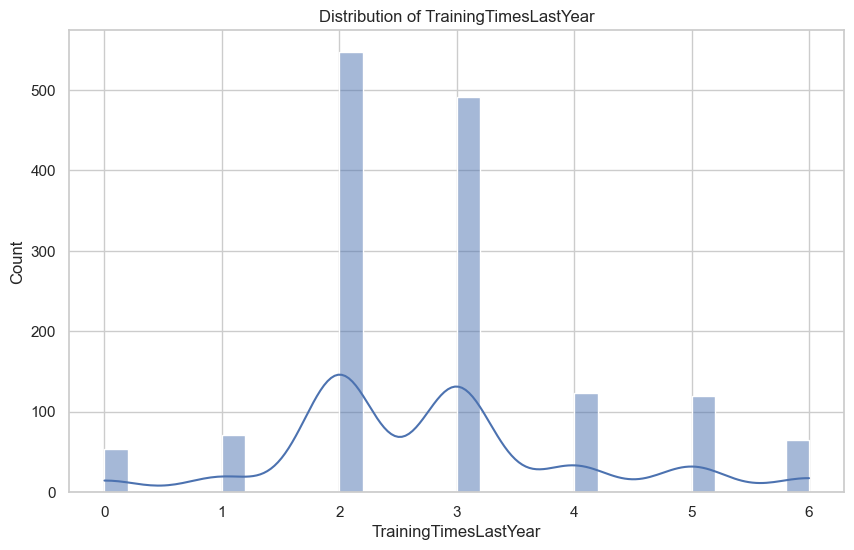

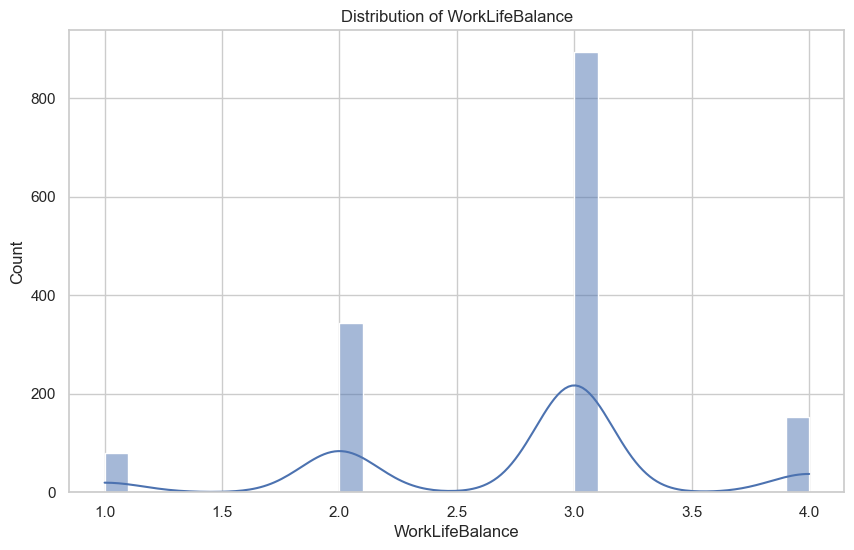

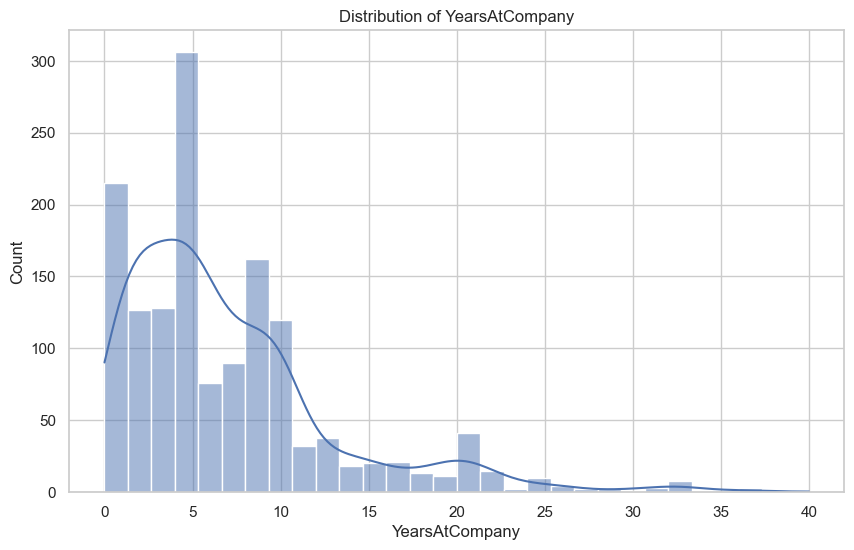

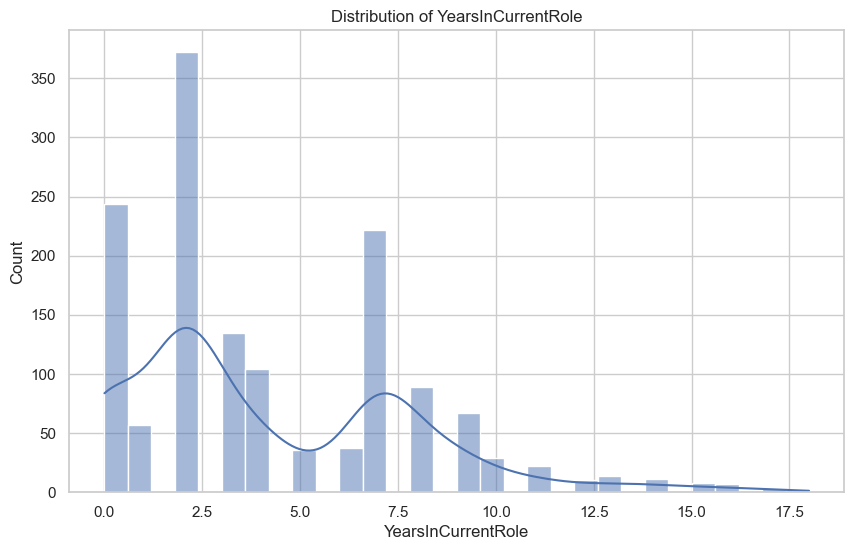

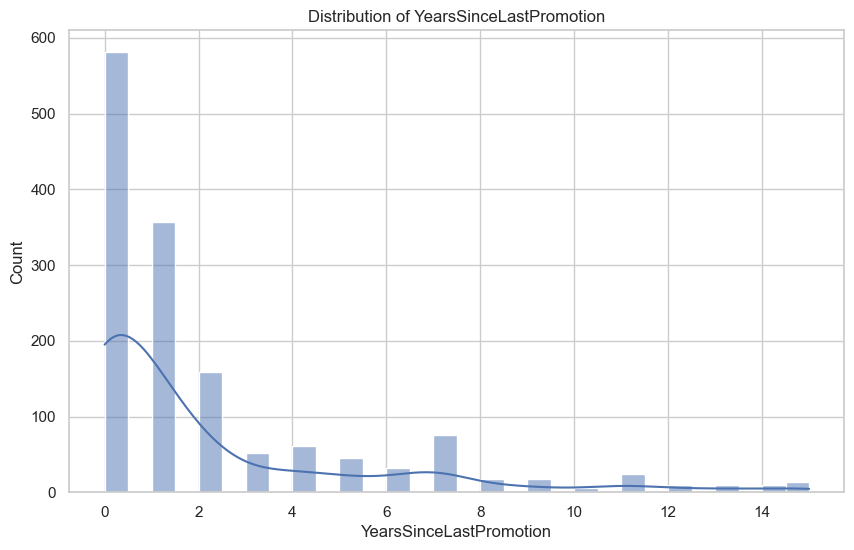

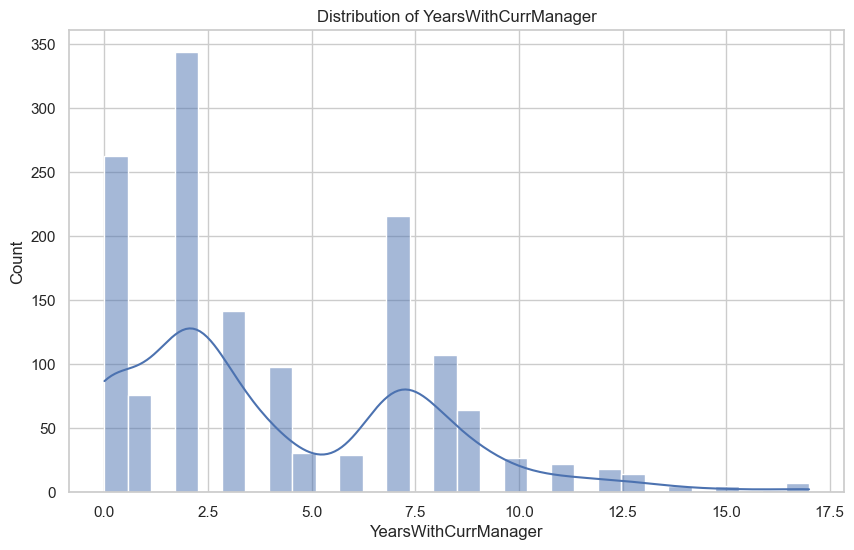

In [12]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


### boxplot visualisation

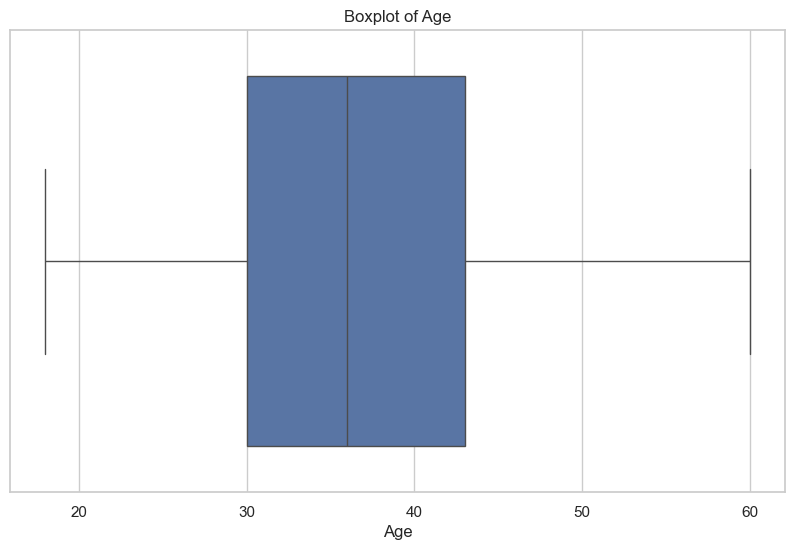

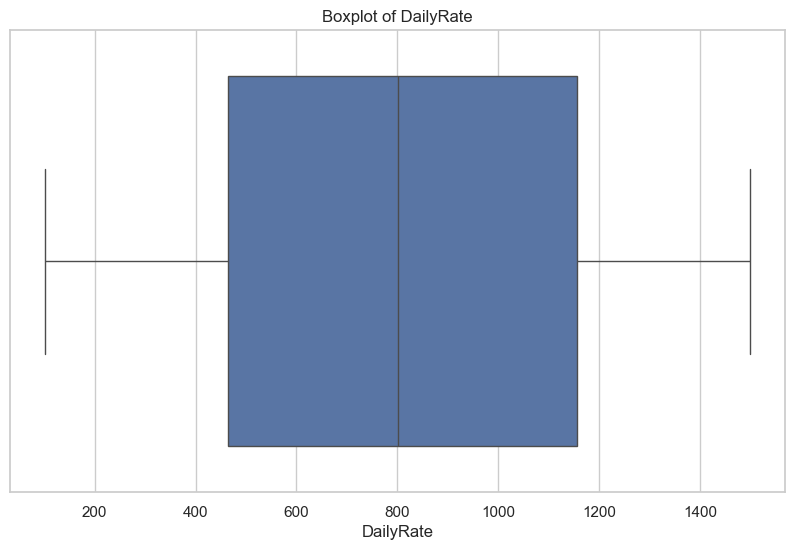

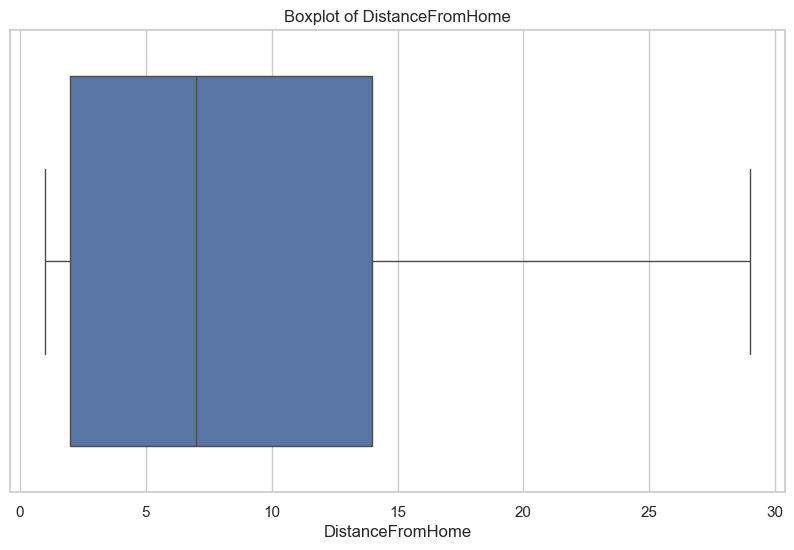

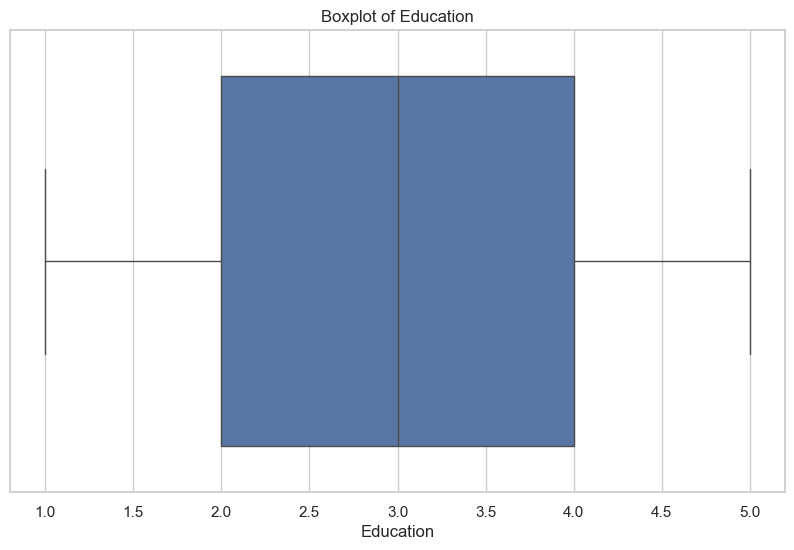

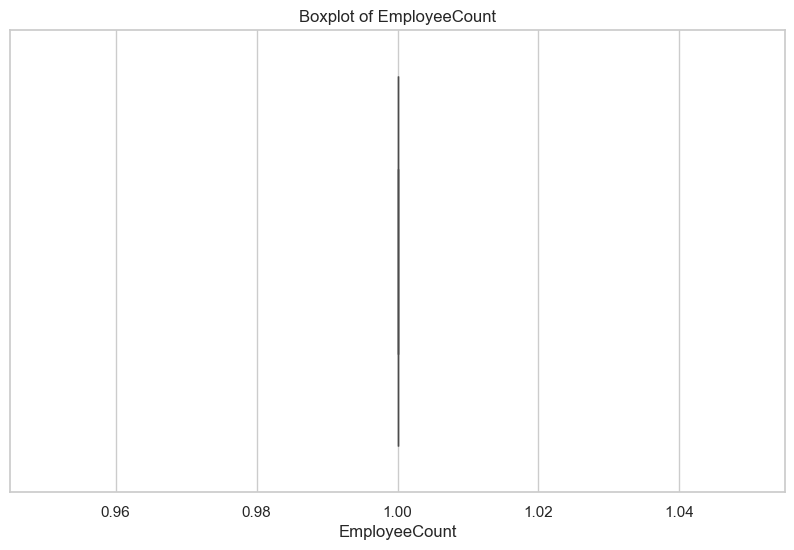

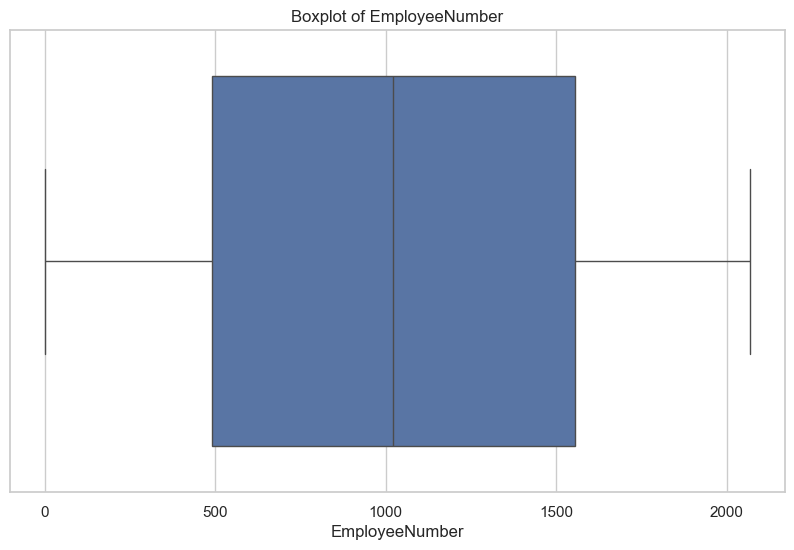

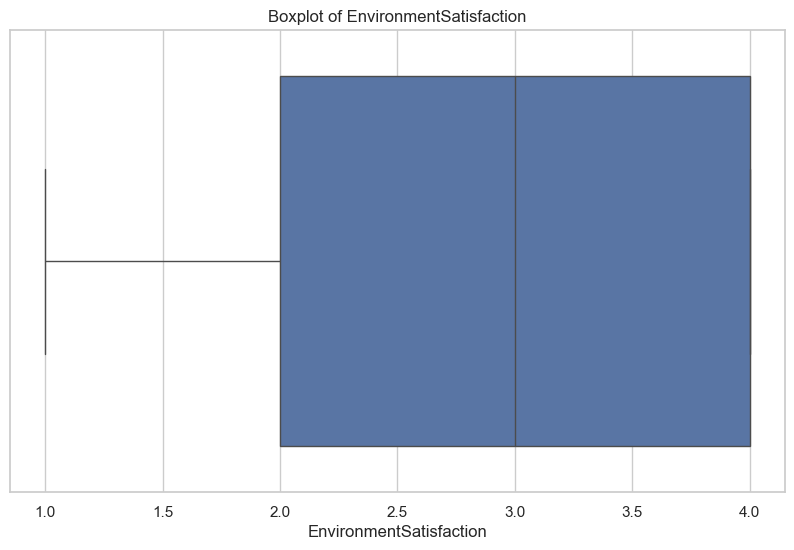

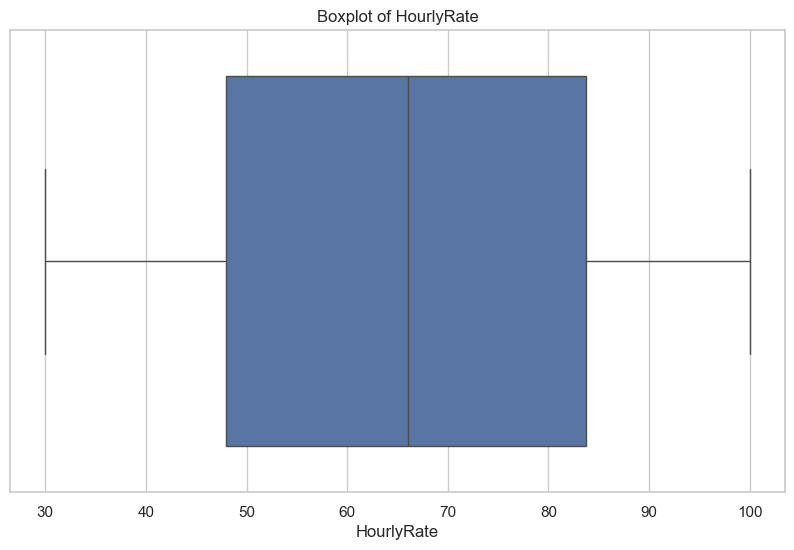

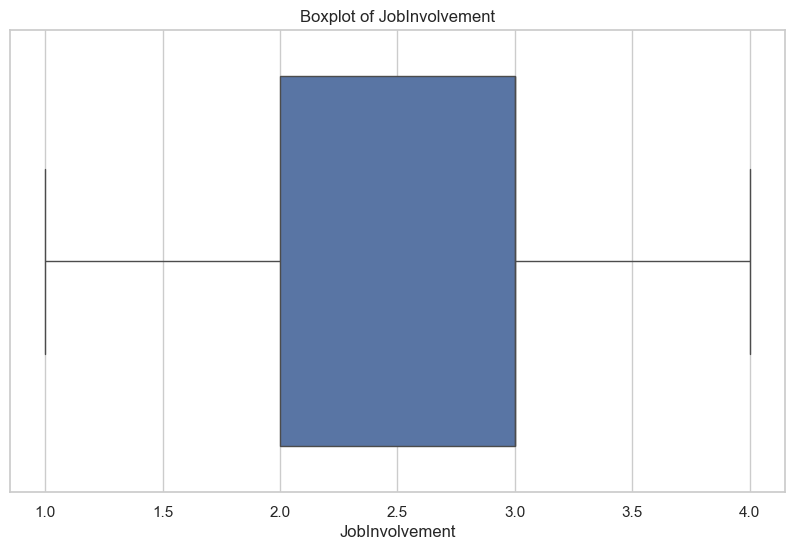

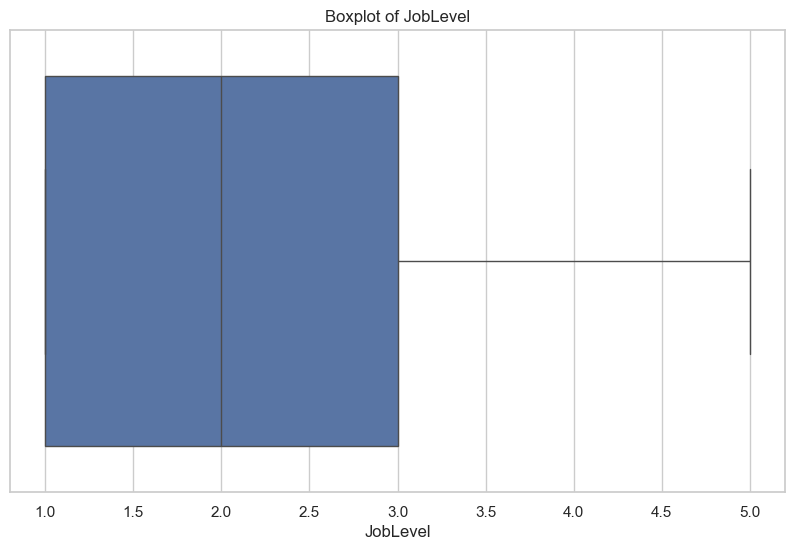

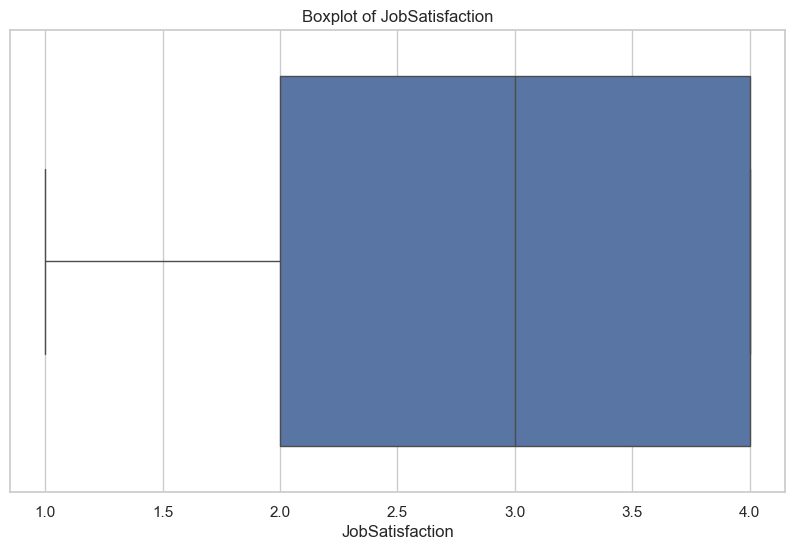

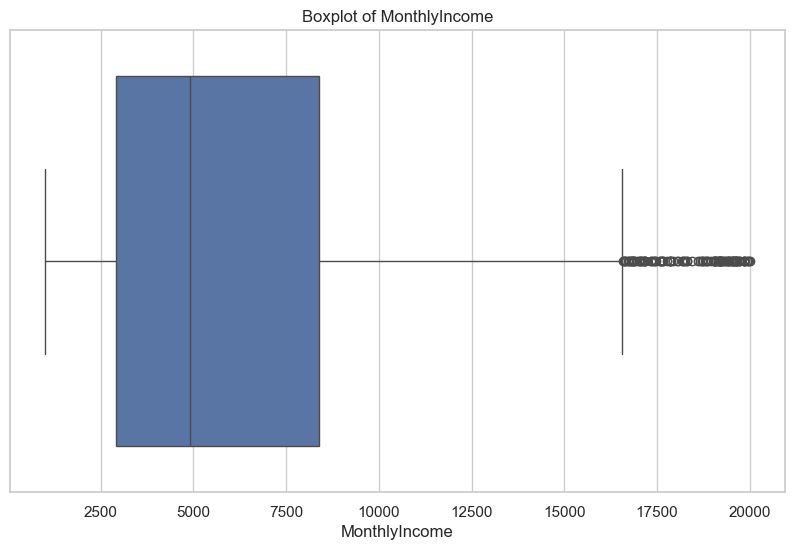

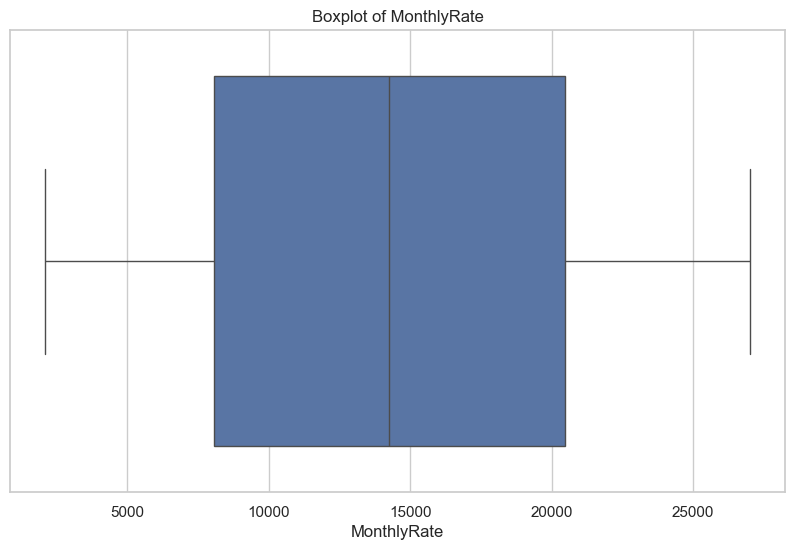

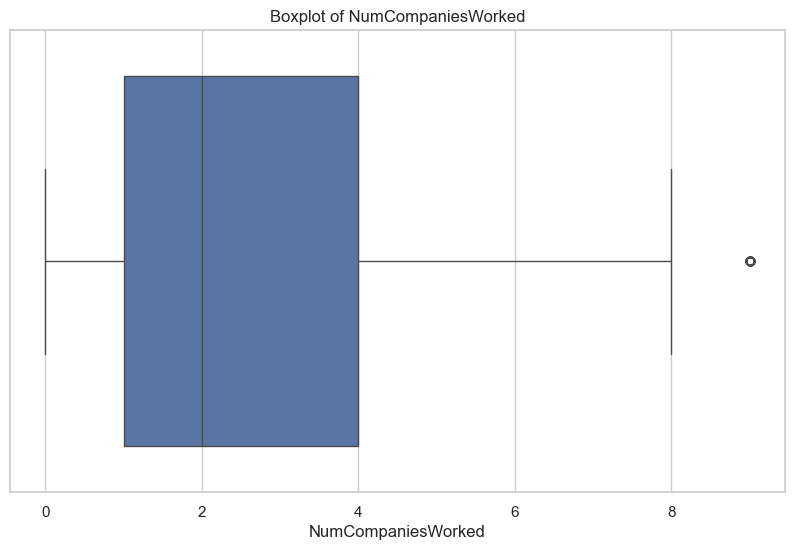

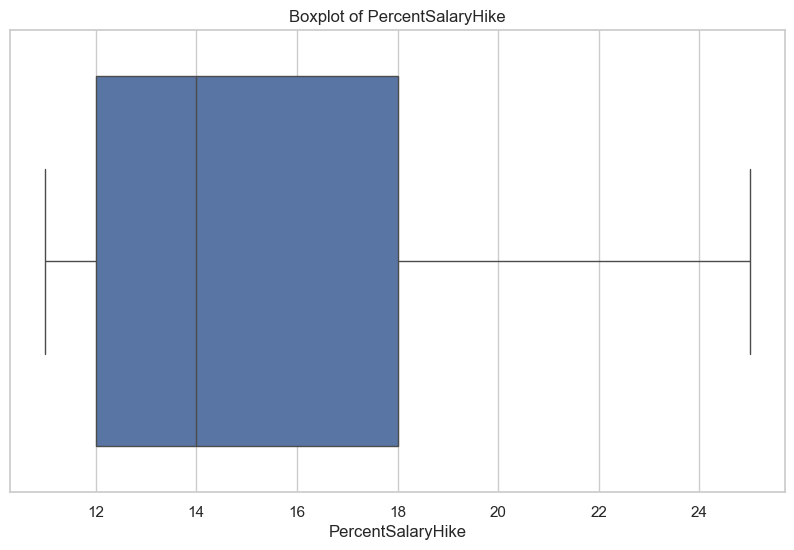

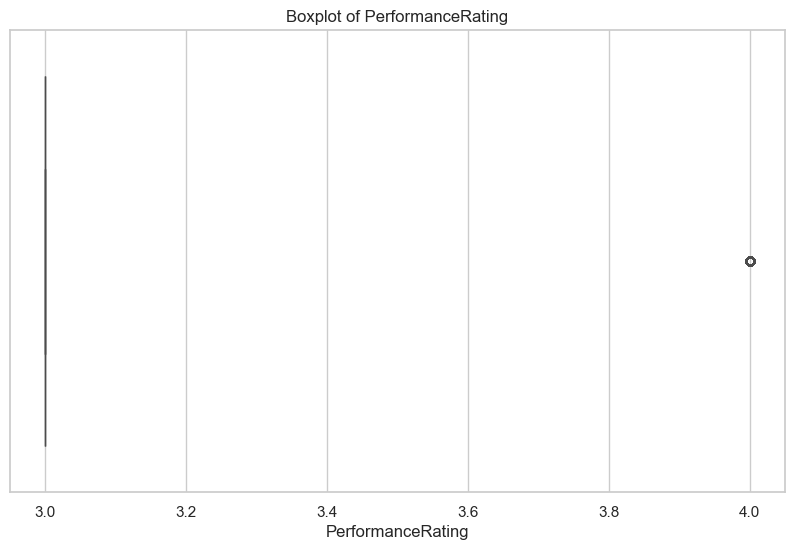

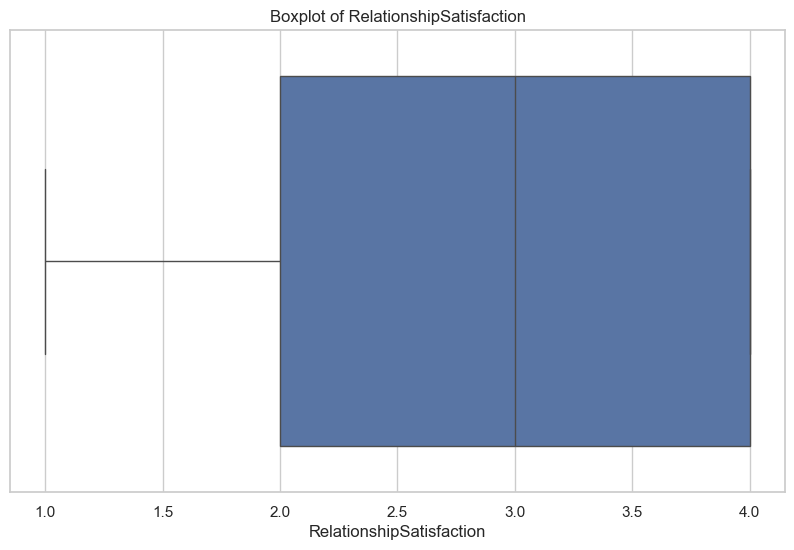

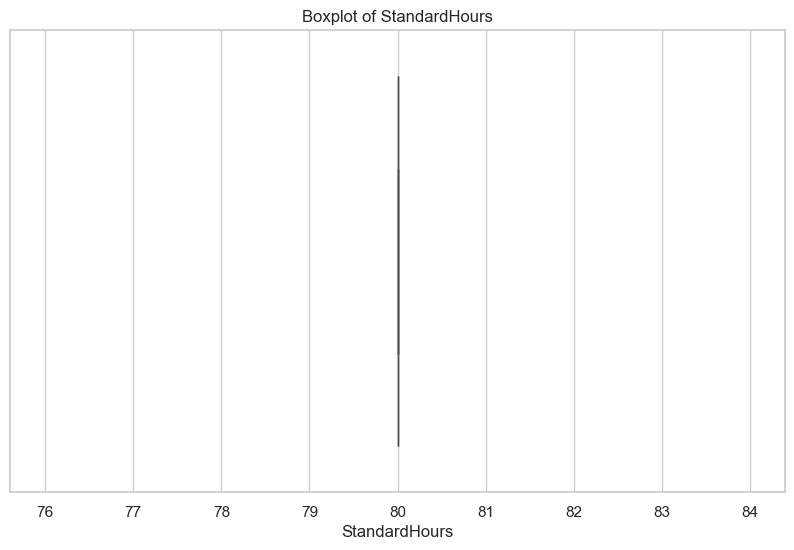

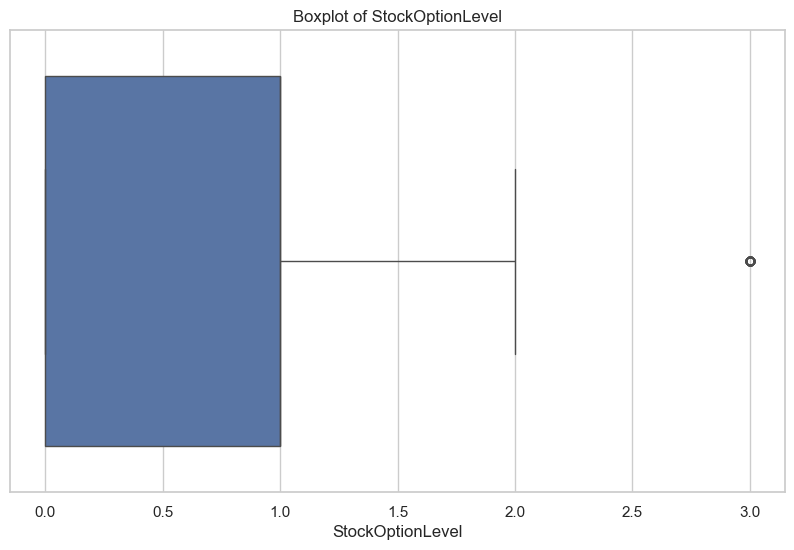

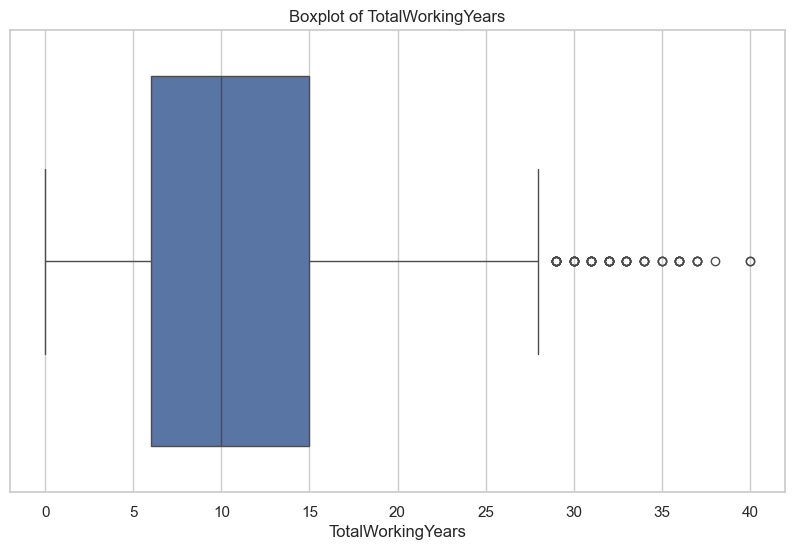

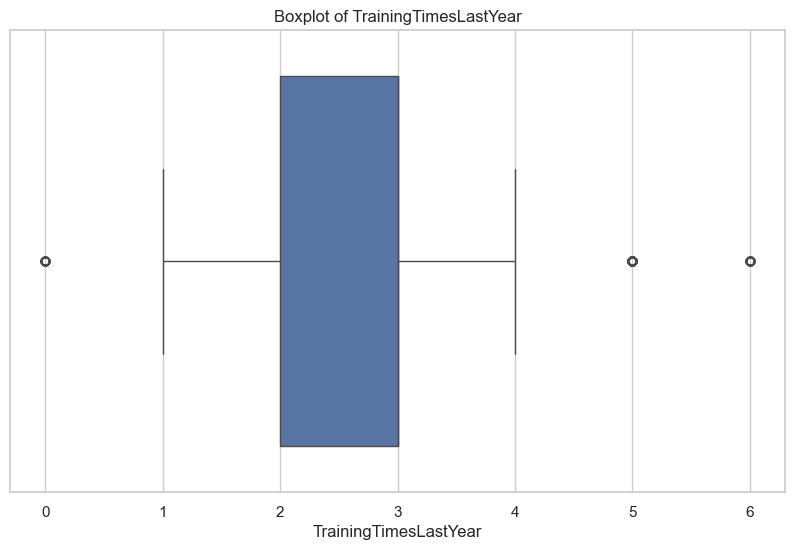

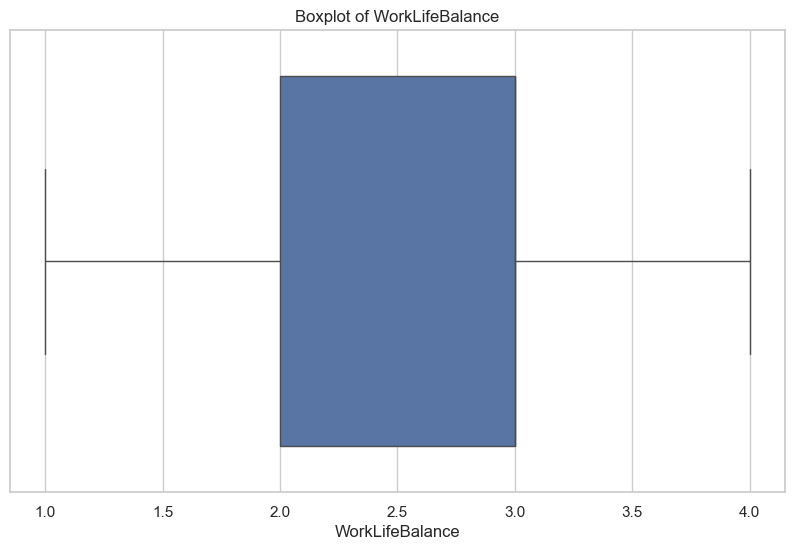

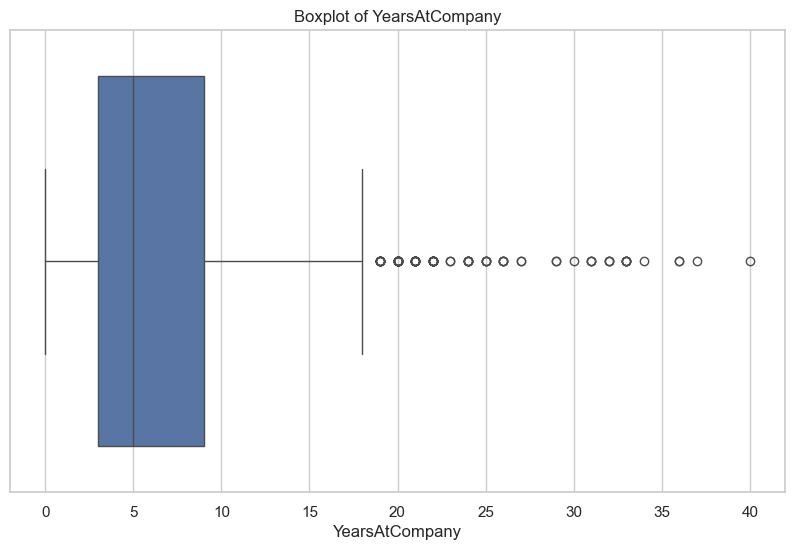

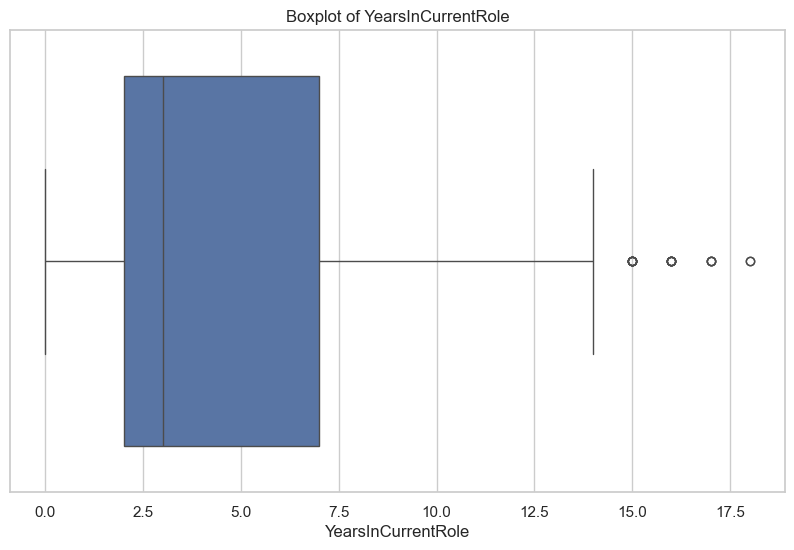

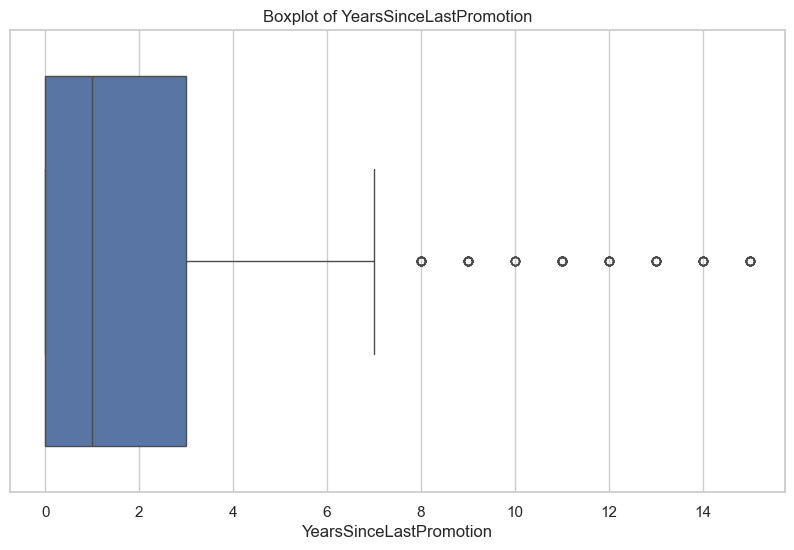

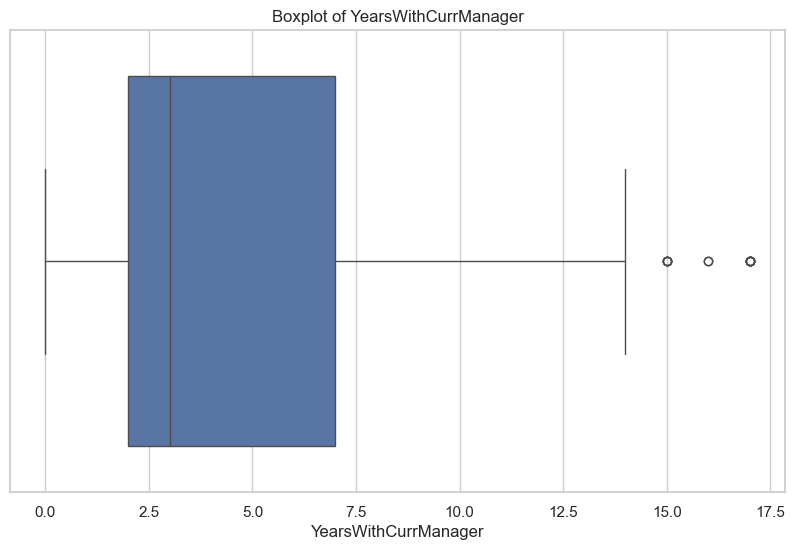

In [13]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()




### countplot visualisation

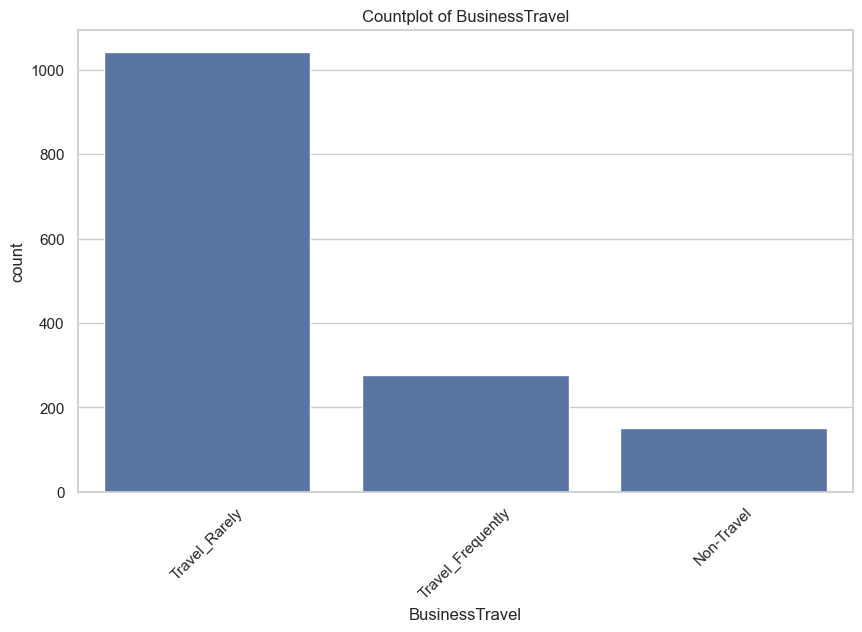

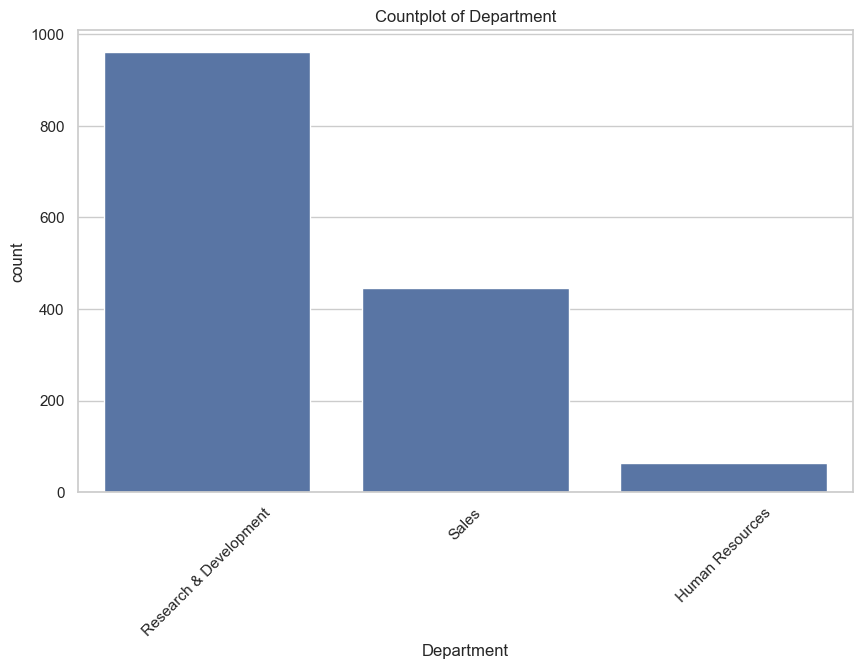

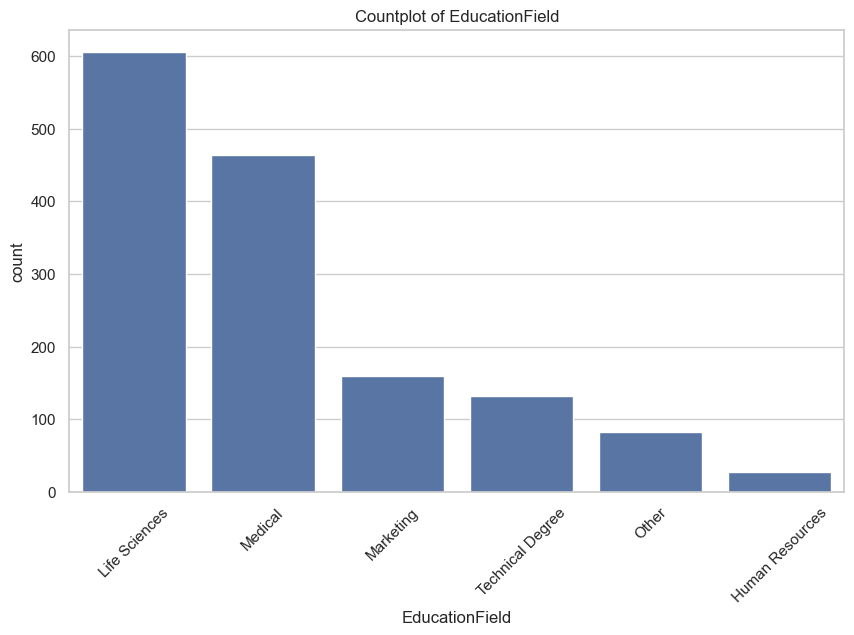

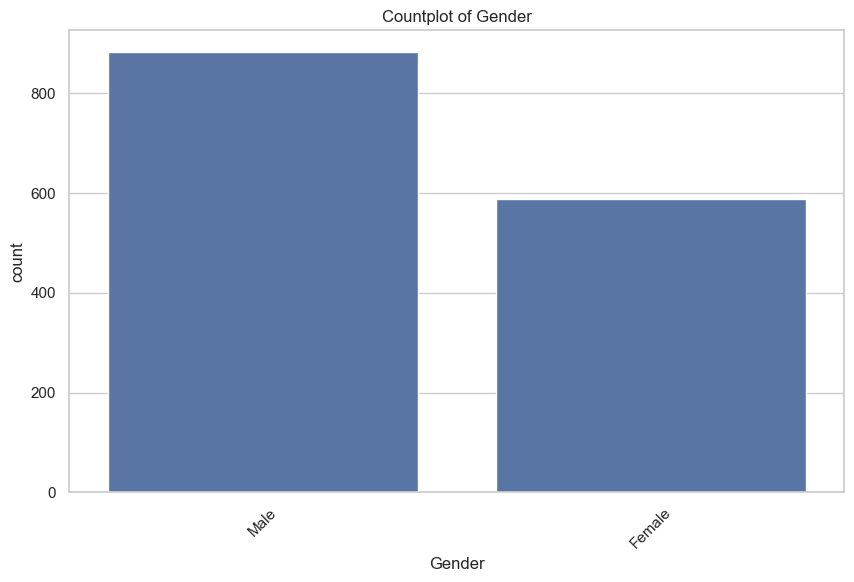

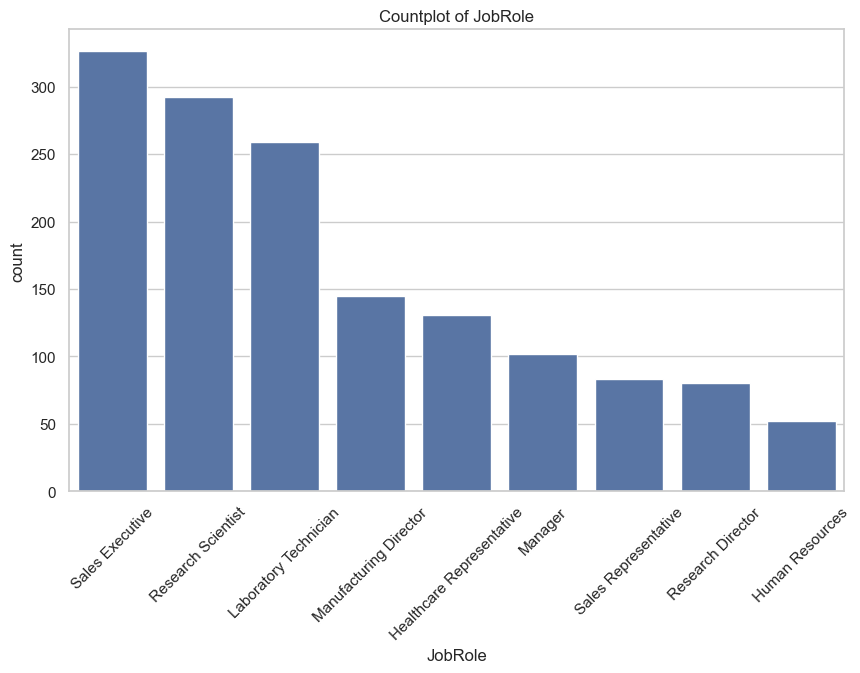

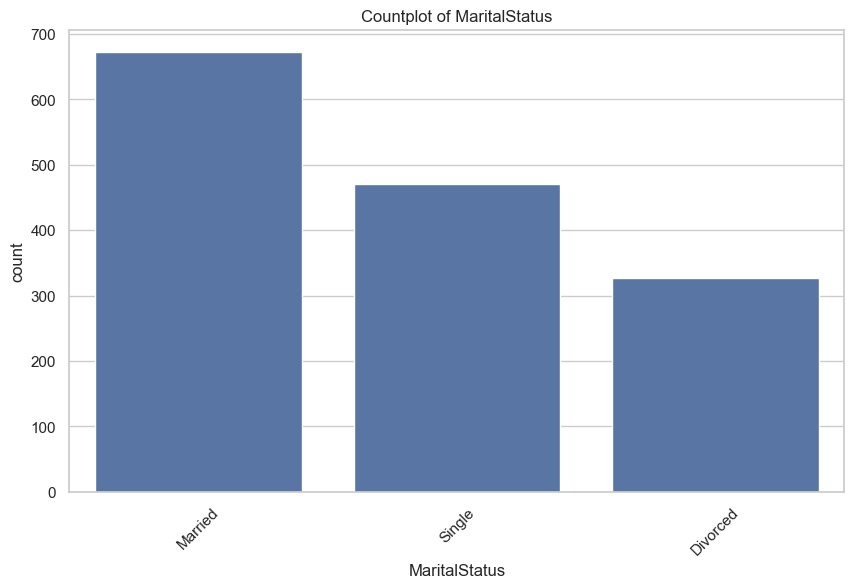

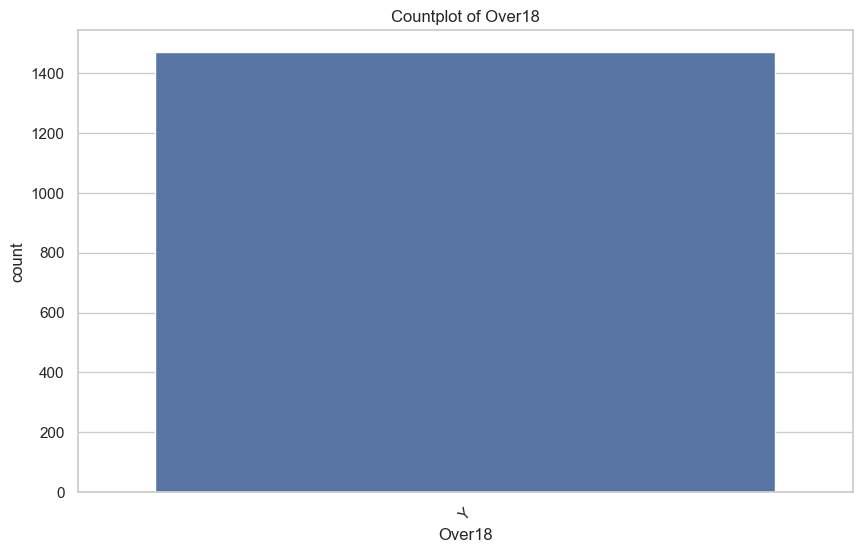

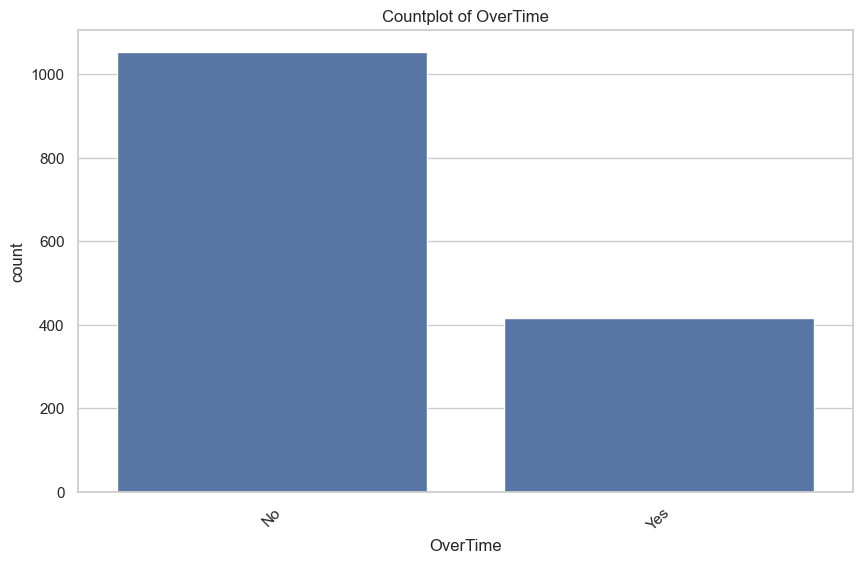

In [14]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()



### heatmap visualisation

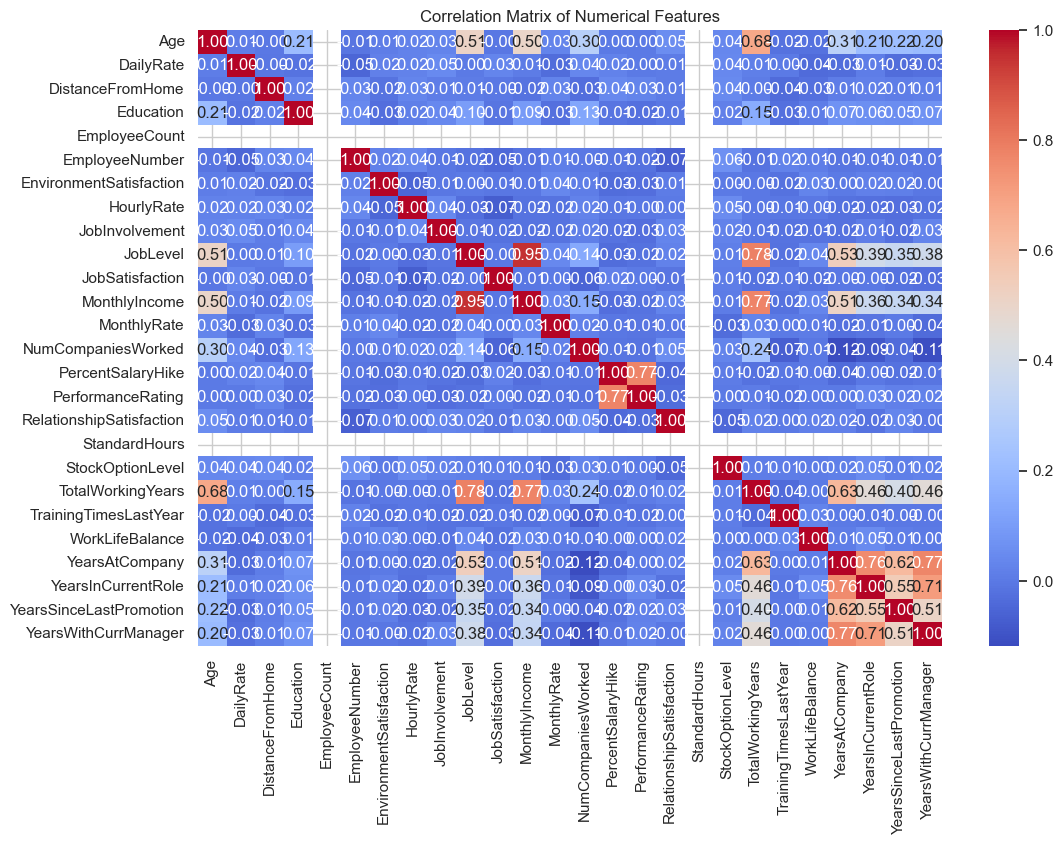

In [15]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## relation ship between features and target value 

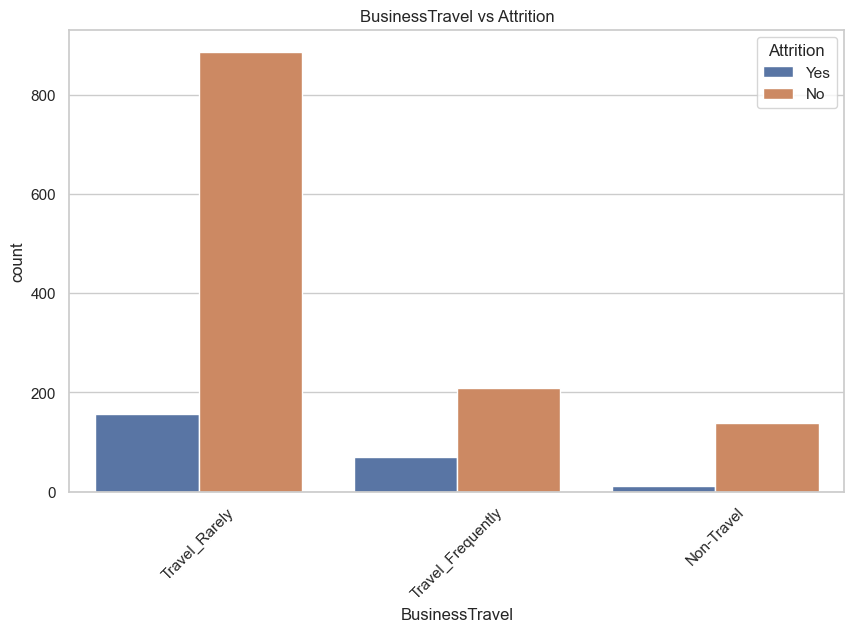

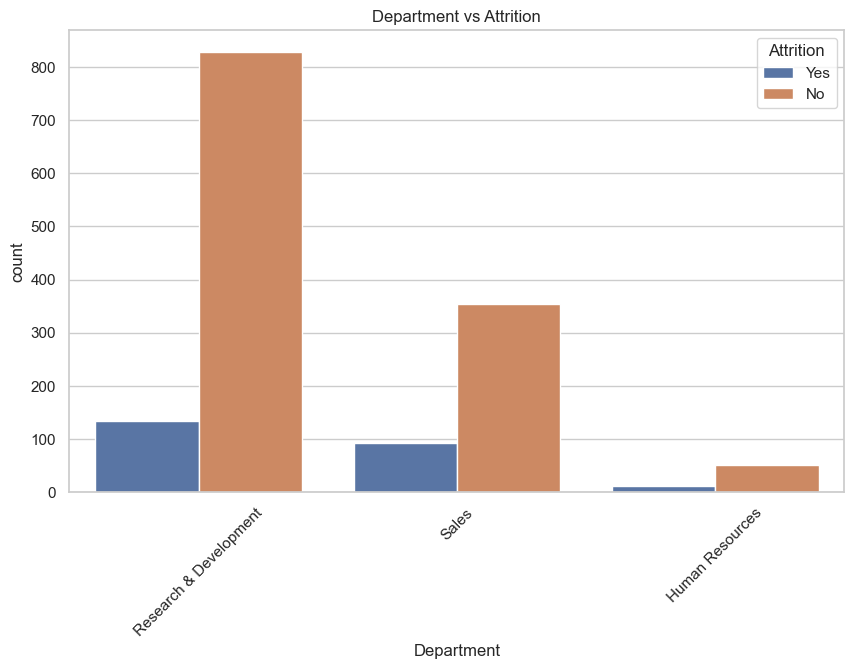

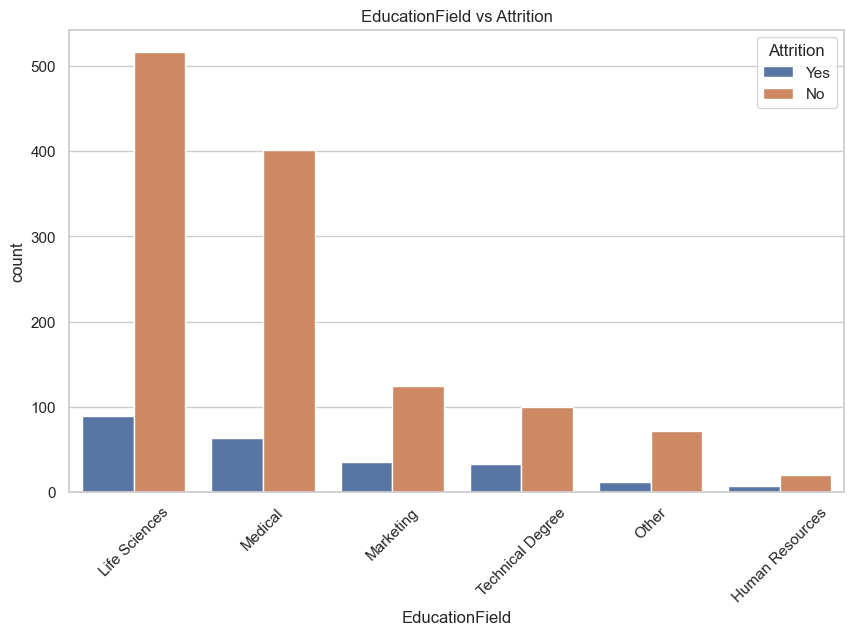

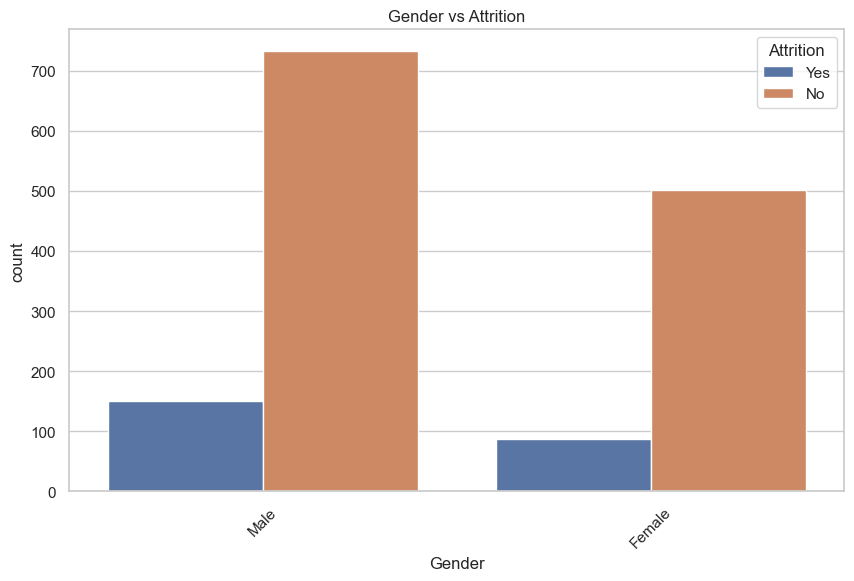

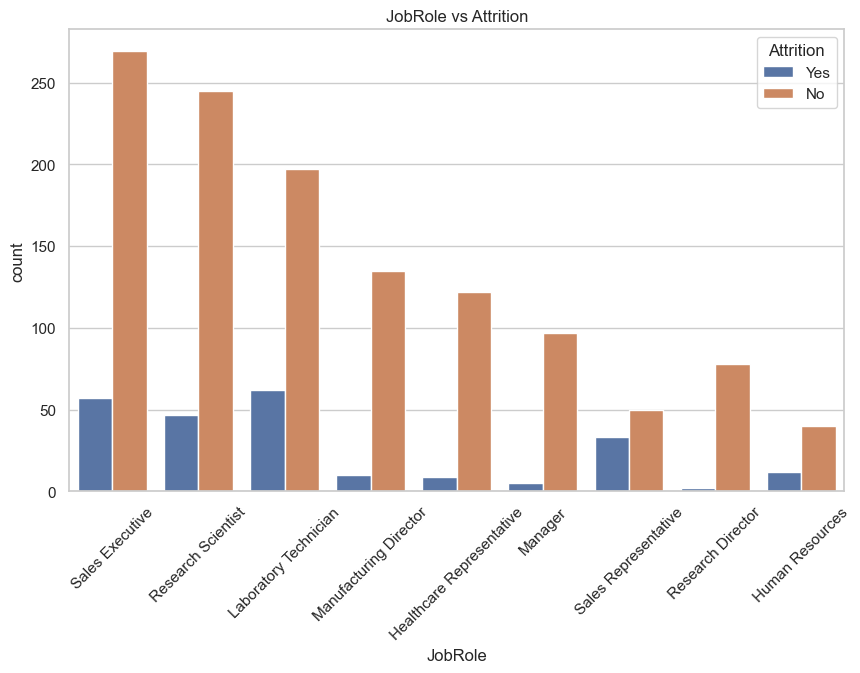

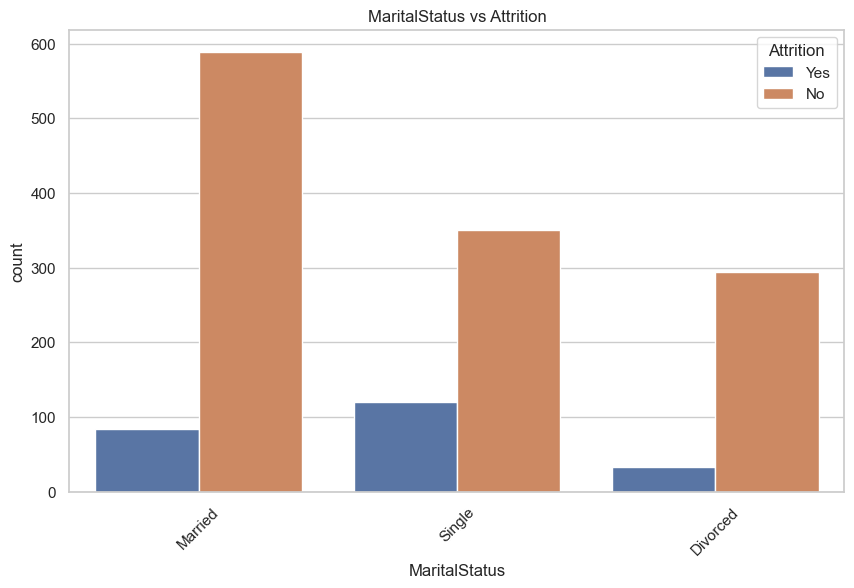

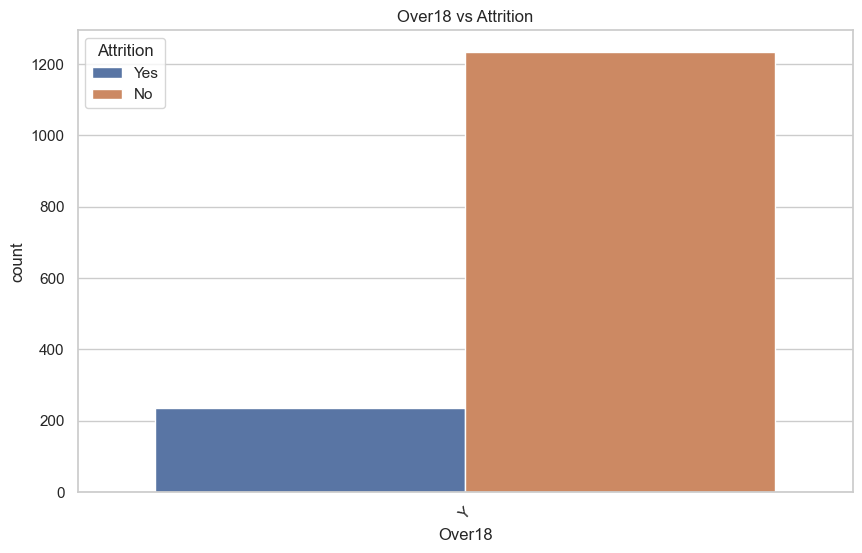

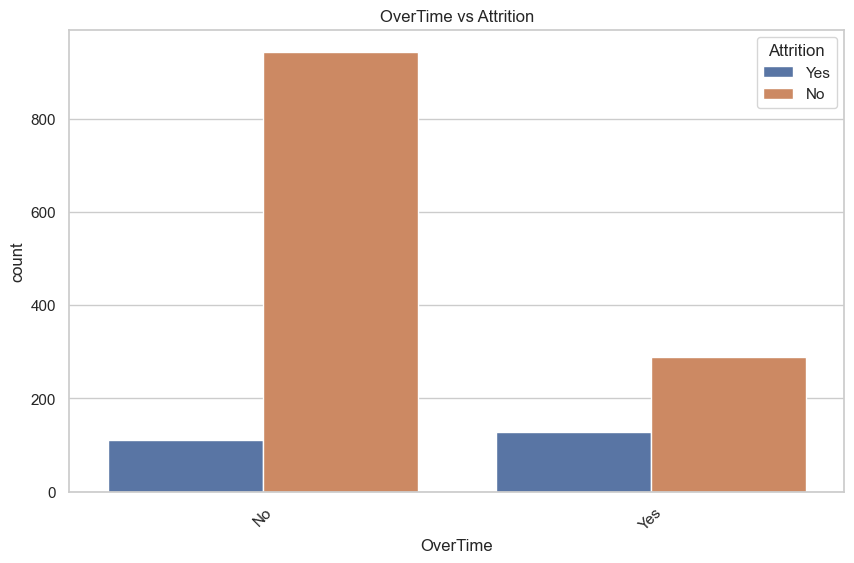

In [16]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=data, x=col, hue='Attrition', order=data[col].value_counts().index)
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()


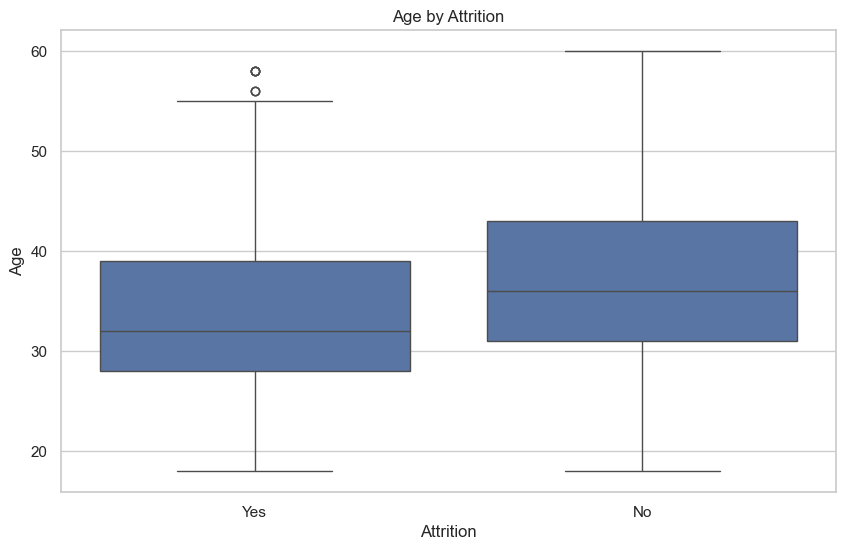

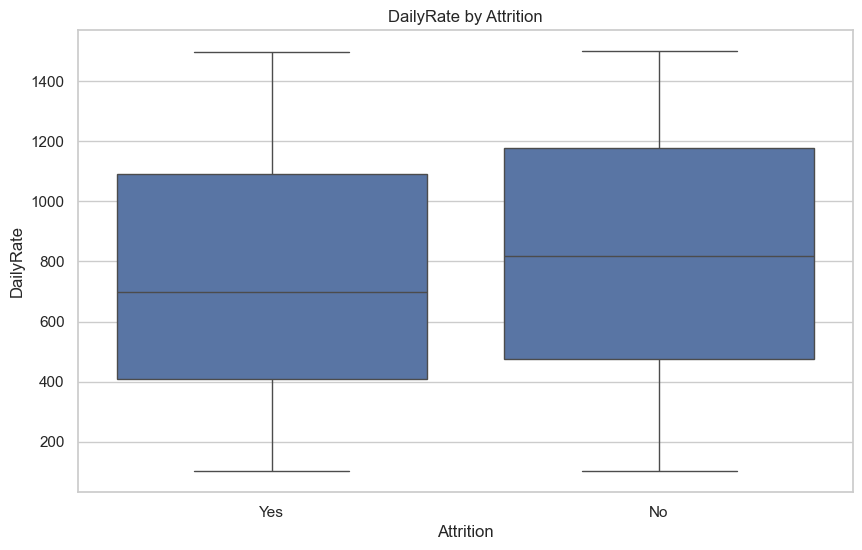

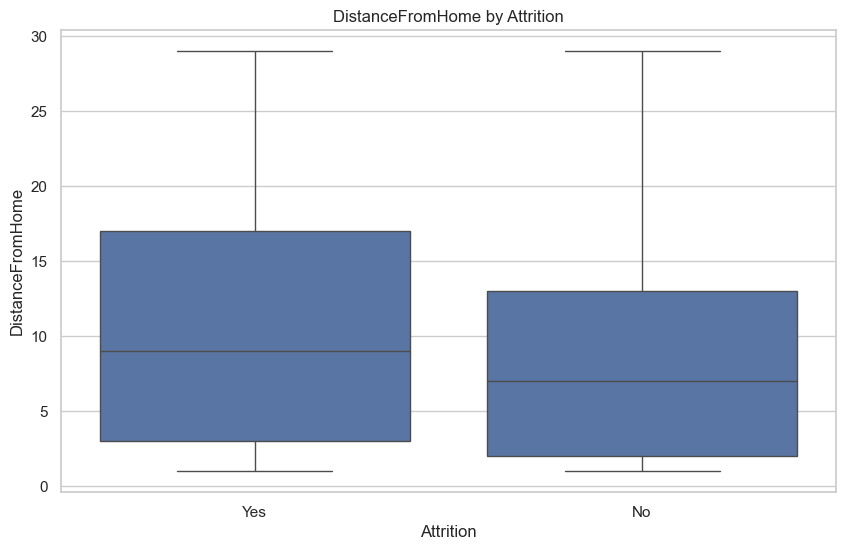

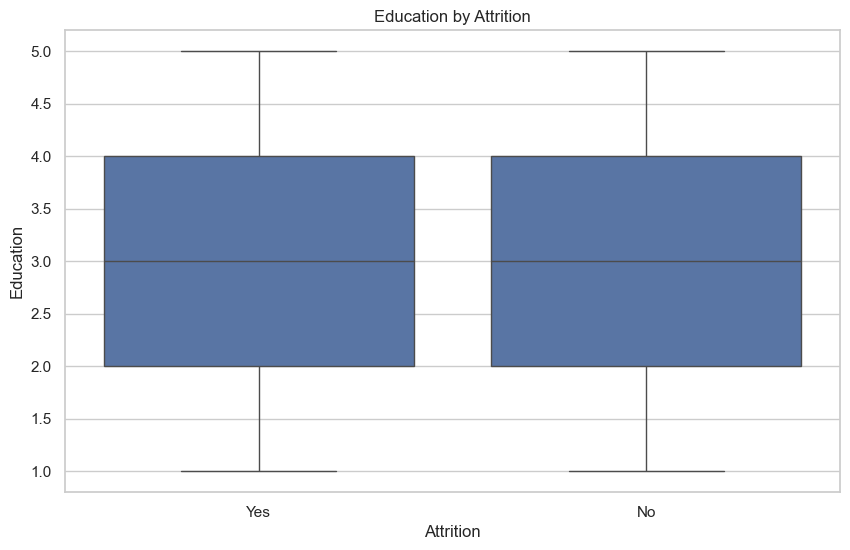

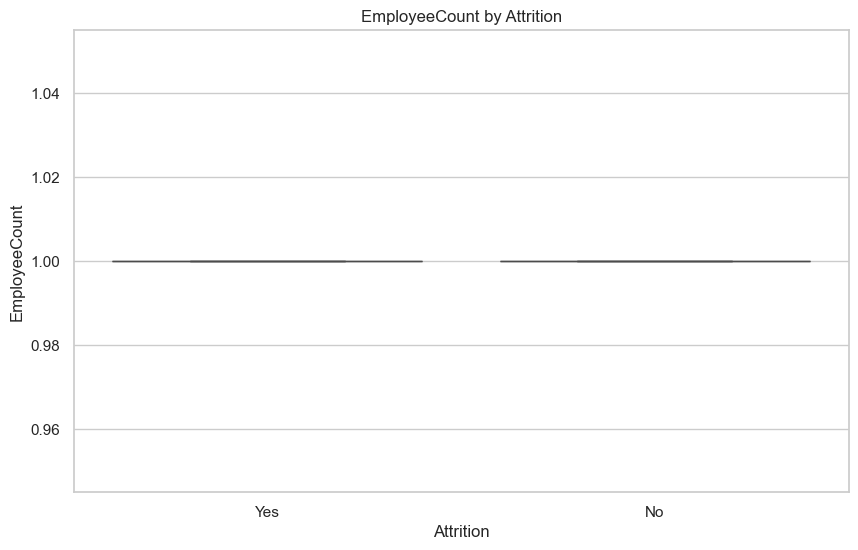

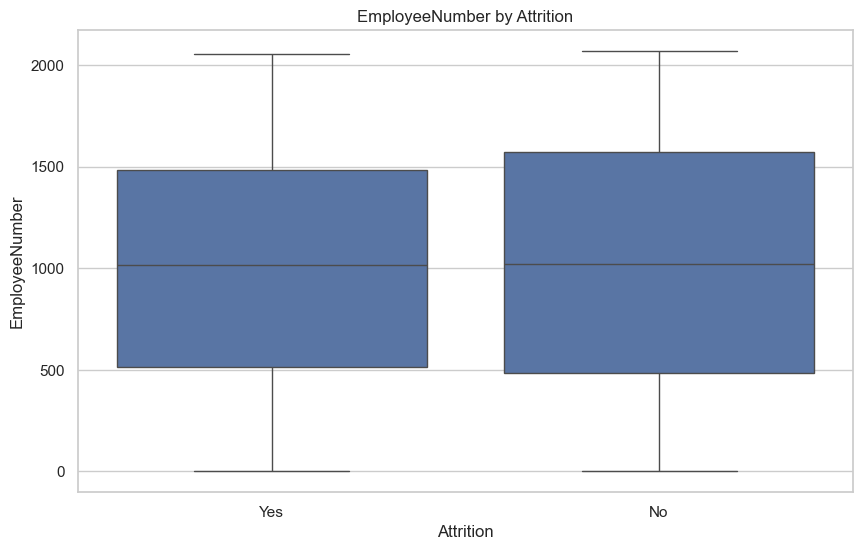

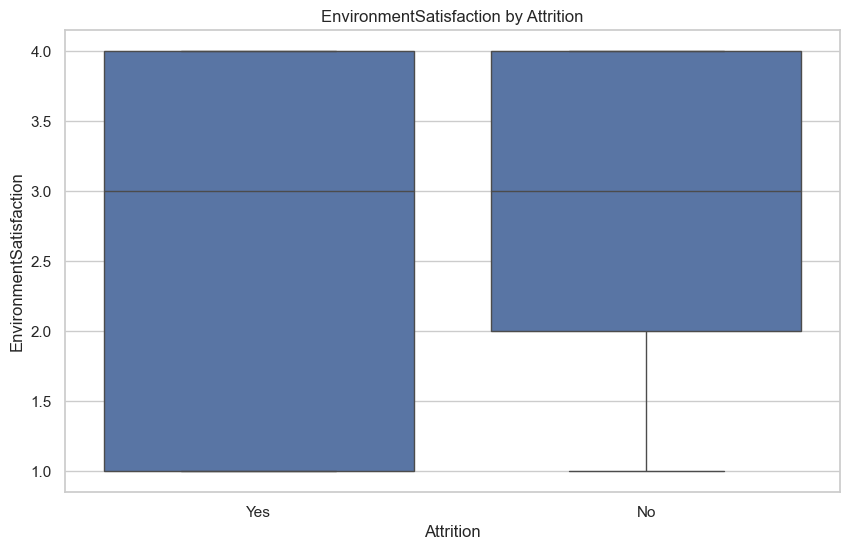

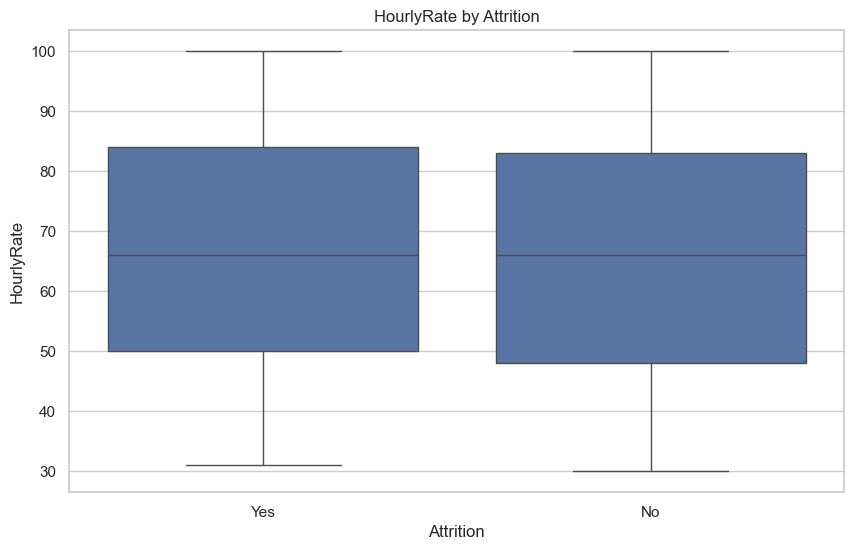

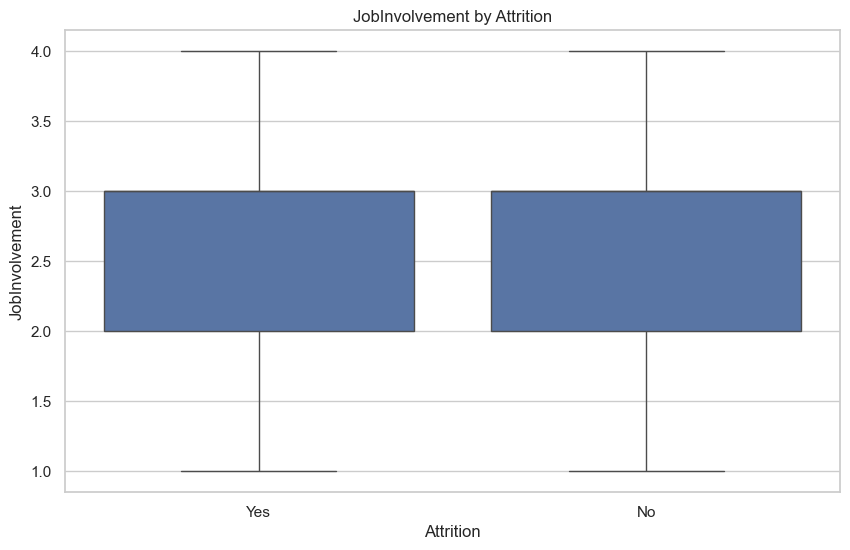

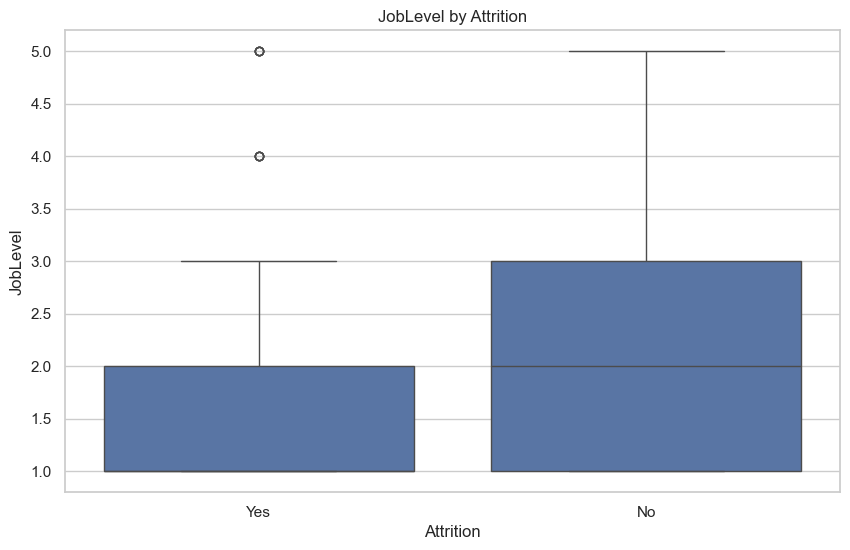

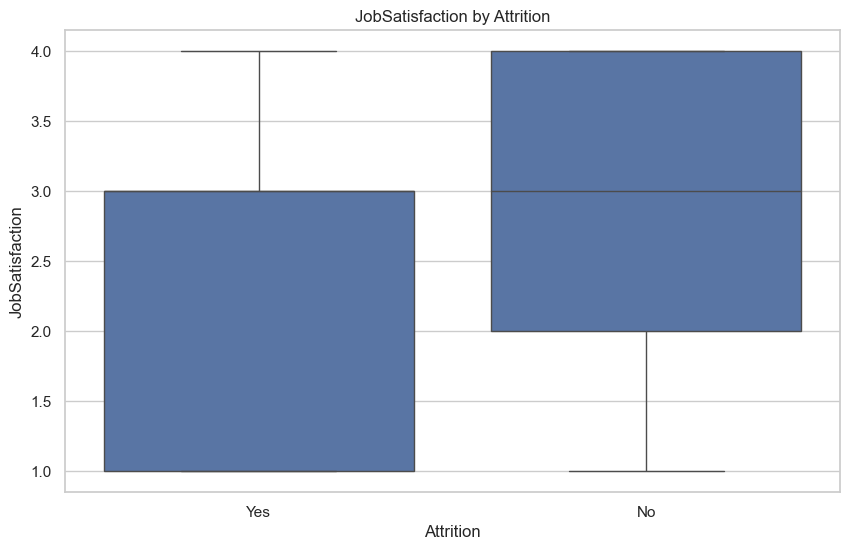

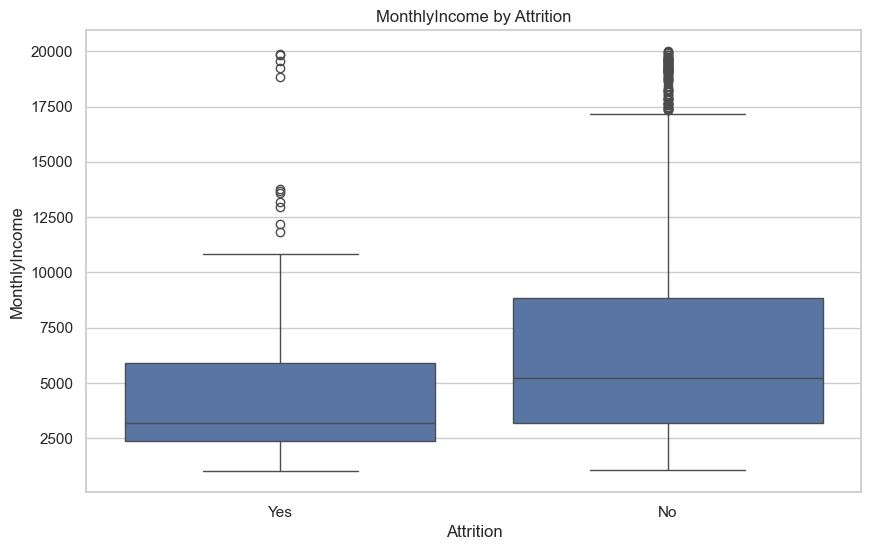

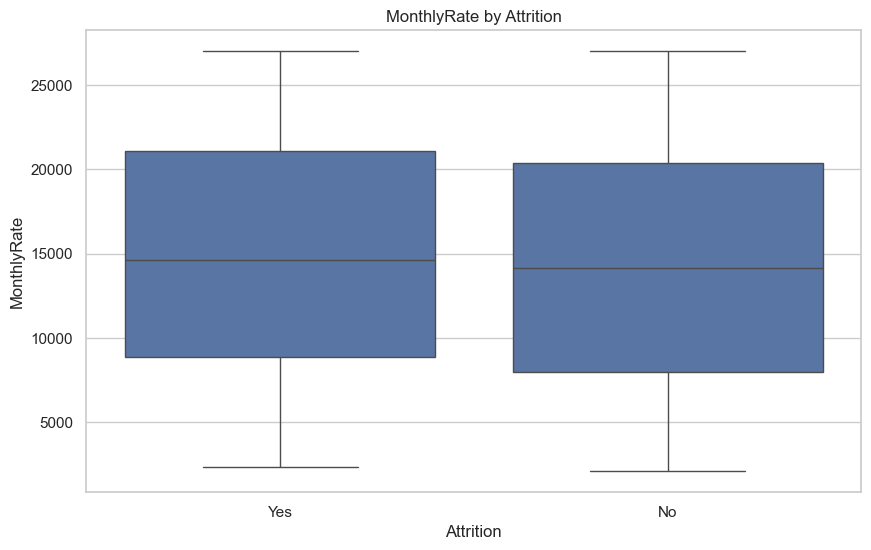

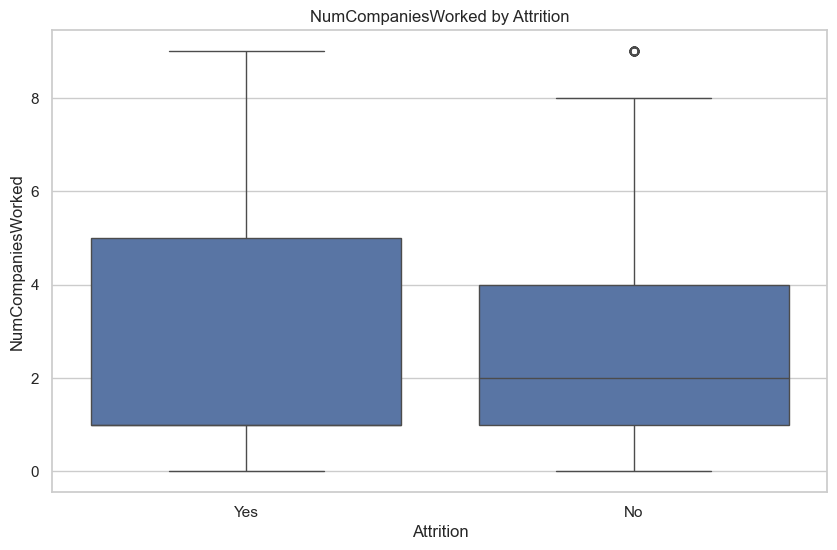

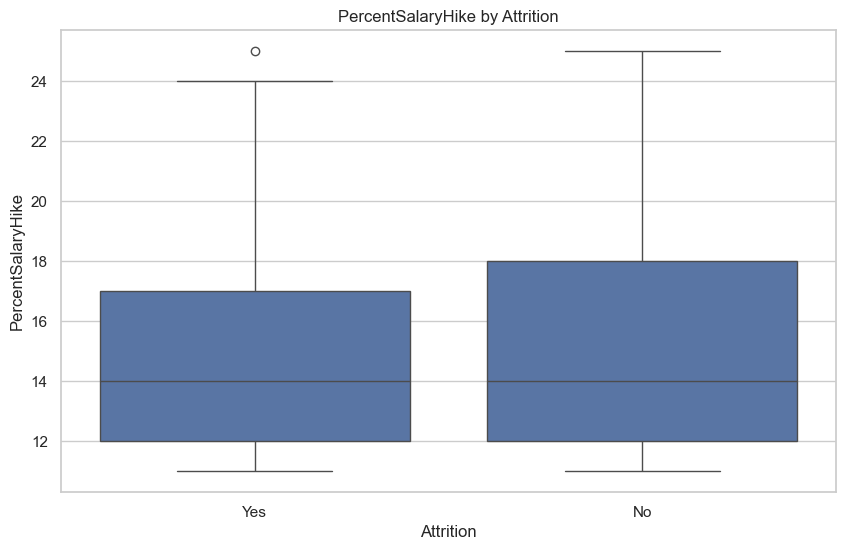

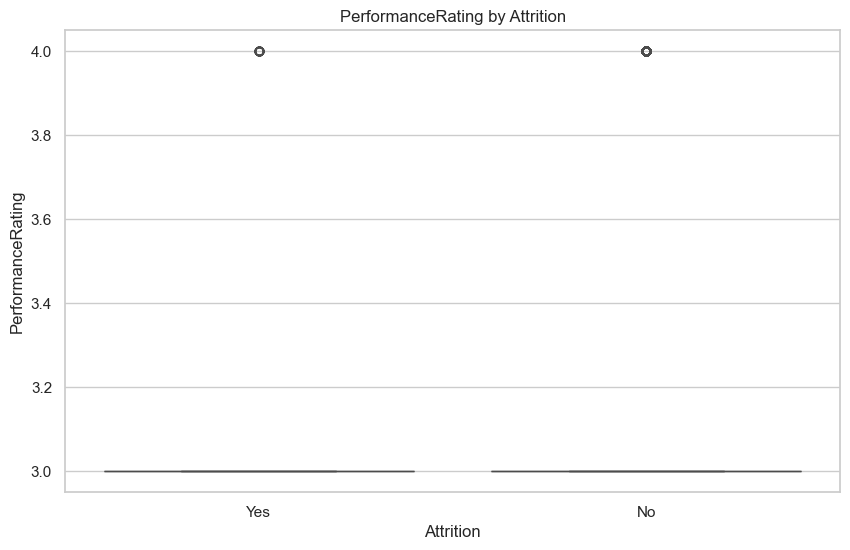

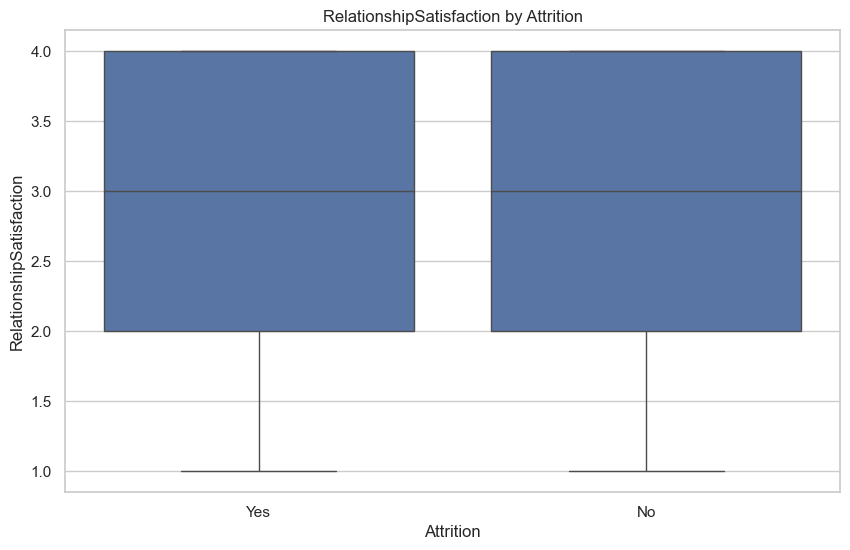

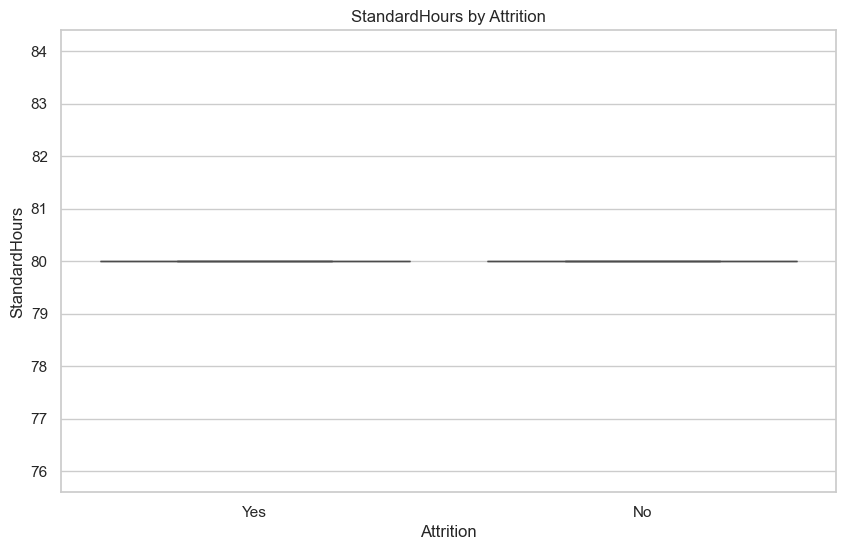

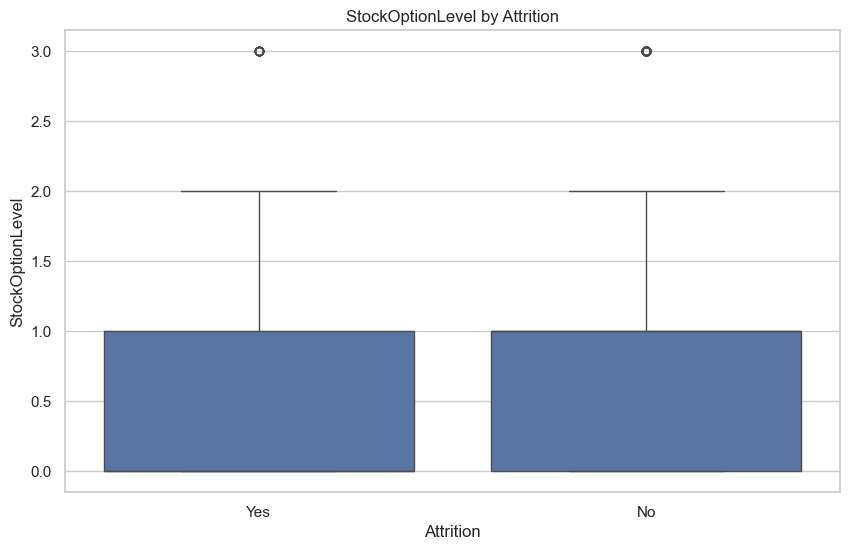

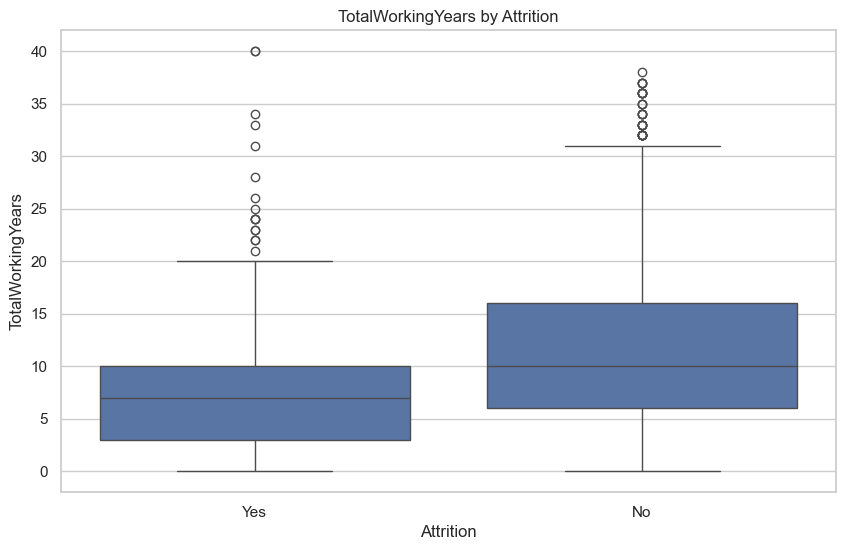

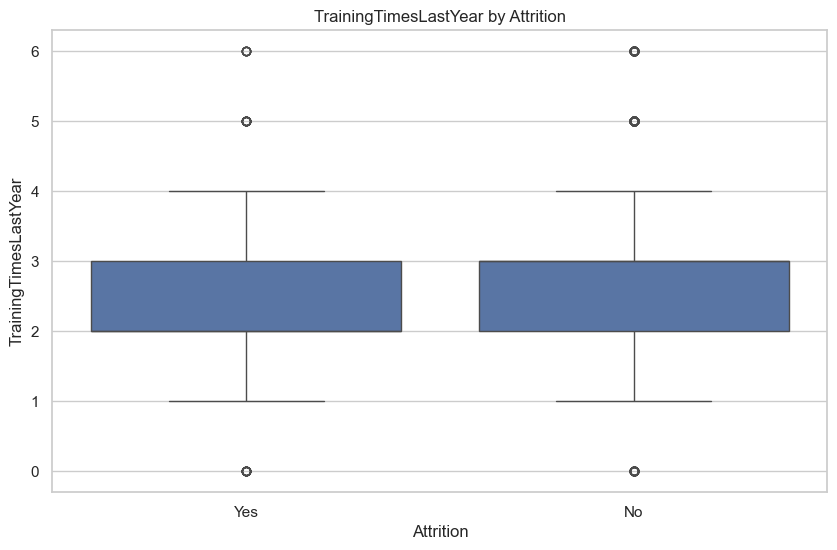

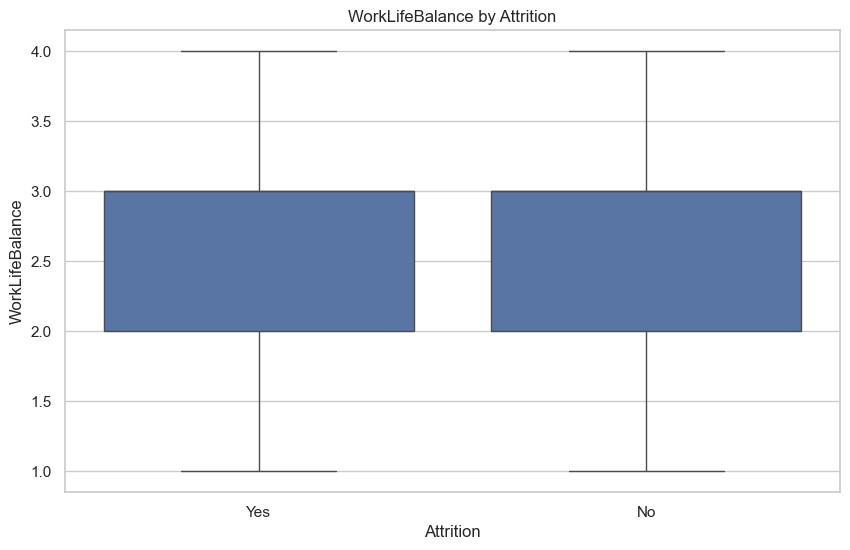

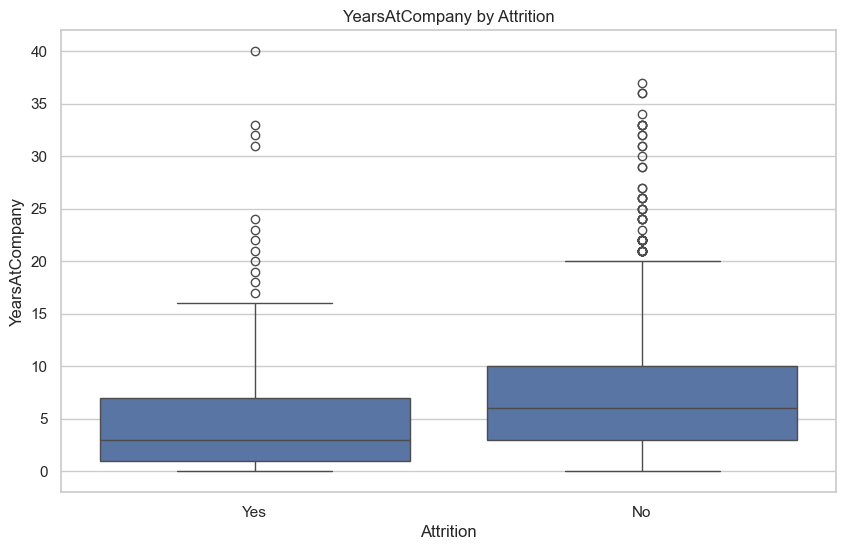

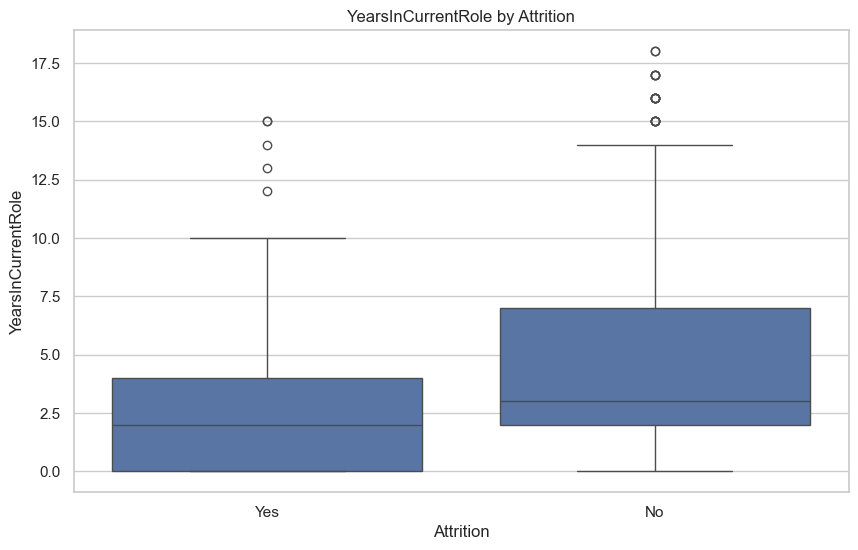

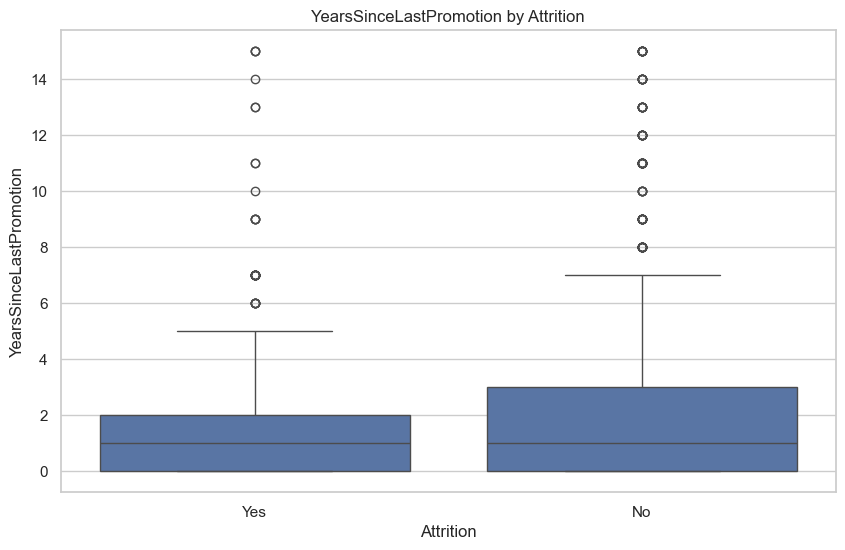

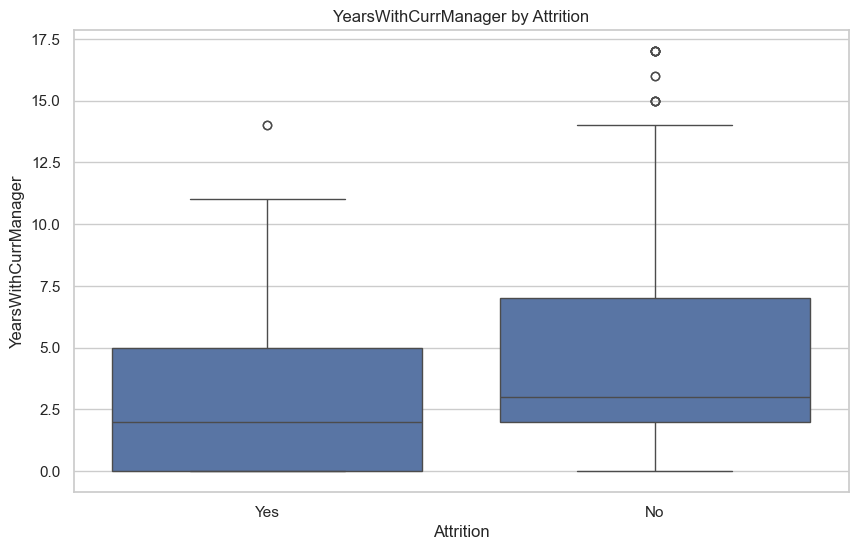

In [17]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=data, x='Attrition', y=col)
    plt.title(f'{col} by Attrition')
    plt.show()


### feature selection

In [18]:
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)


In [19]:

# Separate features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from these lists if it's included
numerical_cols = [col for col in numerical_cols if col != 'Attrition']
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

# 3. Data preprocessing 

## categorical data encoding 

In [20]:
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


In [21]:

for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [22]:

X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [23]:
X['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [24]:
# ordinal encoding 

from sklearn.preprocessing import OrdinalEncoder

categories = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]
encoder = OrdinalEncoder(categories=categories)

X['BusinessTravel'] = encoder.fit_transform(X[['BusinessTravel']])

X['BusinessTravel'] = X['BusinessTravel'].astype(int)



In [25]:
#label encoding 

nominal_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
X = pd.get_dummies(X, columns=nominal_cols, drop_first=True)


In [26]:

X.head(20)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,2,279,8,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,2,1392,3,4,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,1,591,2,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False
5,32,2,1005,2,2,8,4,79,3,1,...,True,False,False,False,False,False,False,False,True,False
6,59,1,1324,3,3,10,3,81,4,1,...,True,False,False,False,False,False,False,True,False,True
7,30,1,1358,24,1,11,4,67,3,1,...,True,False,False,False,False,False,False,False,False,False
8,38,2,216,23,3,12,4,44,2,3,...,False,False,True,False,False,False,False,False,True,False
9,36,1,1299,27,3,13,3,94,3,2,...,False,False,False,False,False,False,False,True,False,False


### scale numerical features

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [28]:
X['BusinessTravel'].notna()

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Name: BusinessTravel, Length: 1470, dtype: bool

### split data 

In [29]:
y = y.map({'Yes': 1, 'No': 0})


In [30]:
from sklearn.model_selection import train_test_split


print(y.isna().sum())  
print(X.isna().sum())  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


0
Age                                  0
BusinessTravel                       0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Department_Research & D

# 4. Model Development and evaluation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
# Initialize the model
log_reg = LogisticRegression(max_iter=10000) 

# Fit the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [33]:
y_pred = log_reg.predict(X_test)


In [34]:
y_prob = log_reg.predict_proba(X_test)[:, 1]  


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import pandas as pd

# Basic Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

print("\n=== Confusion Matrix ===")
print(cm_df)

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Yes Attrition']))


=== Evaluation Metrics ===
Accuracy : 0.8571
Precision: 0.6000
Recall   : 0.3191
F1 Score : 0.4167

=== Confusion Matrix ===
            Predicted No  Predicted Yes
Actual No            237             10
Actual Yes            32             15

=== Classification Report ===
               precision    recall  f1-score   support

 No Attrition       0.88      0.96      0.92       247
Yes Attrition       0.60      0.32      0.42        47

     accuracy                           0.86       294
    macro avg       0.74      0.64      0.67       294
 weighted avg       0.84      0.86      0.84       294



### adding class weights

In [36]:
logreg = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

In [37]:
y_pred = logreg.predict(X_test)


In [38]:
y_prob = logreg.predict_proba(X_test)[:, 1]  


In [39]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import pandas as pd


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

print("\n=== Confusion Matrix ===")
print(cm_df)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Yes Attrition']))


=== Evaluation Metrics ===
Accuracy : 0.7551
Precision: 0.3563
Recall   : 0.6596
F1 Score : 0.4627

=== Confusion Matrix ===
            Predicted No  Predicted Yes
Actual No            191             56
Actual Yes            16             31

=== Classification Report ===
               precision    recall  f1-score   support

 No Attrition       0.92      0.77      0.84       247
Yes Attrition       0.36      0.66      0.46        47

     accuracy                           0.76       294
    macro avg       0.64      0.72      0.65       294
 weighted avg       0.83      0.76      0.78       294



# 5. Conclusion and interpretation


After cleaning the data and training a balanced Logistic Regression model, i reached 75.5% accuracy. i improved recall for predicting attrition to 66%, meaning the model now catches more employees likely to leave. 

While precision is lower (36%), this trade-off is acceptabe since i had to add weights to the classes as the dataset for Yes attrition was significantly less than the data provided for No attrition so the model was naturally biased in that direction. 
i also dropped constant columns like 'EmployeeCount', 'StandardCount' and 'Over18' to clean the data and reduce noise. 


